In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
URL = 'electricity.csv'
df = pd.read_csv(URL)

# Data Exploration

In [7]:
print("Return first 5 rows.","\n")
df.head()

Return first 5 rows. 



Start time UTC         End time UTC Start time UTC+03:00  \
0  2015-12-31 21:00:00  2015-12-31 22:00:00  2016-01-01 00:00:00   
1  2015-12-31 22:00:00  2015-12-31 23:00:00  2016-01-01 01:00:00   
2  2015-12-31 23:00:00  2016-01-01 00:00:00  2016-01-01 02:00:00   
3  2016-01-01 00:00:00  2016-01-01 01:00:00  2016-01-01 03:00:00   
4  2016-01-01 01:00:00  2016-01-01 02:00:00  2016-01-01 04:00:00   

    End time UTC+03:00  Electricity consumption in Finland  
0  2016-01-01 01:00:00                             10800.0  
1  2016-01-01 02:00:00                             10431.0  
2  2016-01-01 03:00:00                             10005.0  
3  2016-01-01 04:00:00                              9722.0  
4  2016-01-01 05:00:00                              9599.0

In [8]:
print("Return last 5 rows.","\n")
df.tail()

Return last 5 rows. 



Start time UTC         End time UTC Start time UTC+03:00  \
52961  2021-12-31 16:00:00  2021-12-31 17:00:00  2021-12-31 19:00:00   
52962  2021-12-31 17:00:00  2021-12-31 18:00:00  2021-12-31 20:00:00   
52963  2021-12-31 18:00:00  2021-12-31 19:00:00  2021-12-31 21:00:00   
52964  2021-12-31 19:00:00  2021-12-31 20:00:00  2021-12-31 22:00:00   
52965  2021-12-31 20:00:00  2021-12-31 21:00:00  2021-12-31 23:00:00   

        End time UTC+03:00  Electricity consumption in Finland  
52961  2021-12-31 20:00:00                             11447.0  
52962  2021-12-31 21:00:00                             11237.0  
52963  2021-12-31 22:00:00                             10914.0  
52964  2021-12-31 23:00:00                             10599.0  
52965  2022-01-01 00:00:00                             10812.0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Start time UTC                      52966 non-null  object 
 1   End time UTC                        52966 non-null  object 
 2   Start time UTC+03:00                52966 non-null  object 
 3   End time UTC+03:00                  52966 non-null  object 
 4   Electricity consumption in Finland  52966 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.0+ MB


In [10]:
print(df.describe(), "\n")

       Electricity consumption in Finland
count                        52966.000000
mean                          9488.750519
std                           1576.241673
min                           5341.000000
25%                           8322.000000
50%                           9277.000000
75%                          10602.000000
max                          15105.000000 



# Feature Extraction

In [11]:
del df["Start time UTC"]
del df["End time UTC"]
del df["Start time UTC+03:00"]
df.rename(columns={"End time UTC+03:00":"DateTime","Electricity consumption in Finland":"Consumption"},inplace=True)
print(df.head(5))

              DateTime  Consumption
0  2016-01-01 01:00:00      10800.0
1  2016-01-01 02:00:00      10431.0
2  2016-01-01 03:00:00      10005.0
3  2016-01-01 04:00:00       9722.0
4  2016-01-01 05:00:00       9599.0


In [12]:
dataset = df
dataset["Month"] = pd.to_datetime(df["DateTime"]).dt.month
dataset["Year"] = pd.to_datetime(df["DateTime"]).dt.year
dataset["Date"] = pd.to_datetime(df["DateTime"]).dt.date
dataset["Time"] = pd.to_datetime(df["DateTime"]).dt.time
dataset["Week"] = pd.to_datetime(df["DateTime"]).dt.isocalendar().week
dataset["Day"] = pd.to_datetime(df["DateTime"]).dt.day_name()
dataset = df.set_index("DateTime")
dataset.index = pd.to_datetime(dataset.index)

In [13]:
print("")
print("Total Number of Years: ", dataset.Year.nunique() )
print(dataset.Year.unique())


Total Number of Years:  7
[2016 2017 2018 2019 2020 2021 2022]


In [14]:
# By assuming week starts on Mondey and ends on Sunday.
# The closest start would be on Monday 4-1-2016
# The closest end would be on sunday 26-12-2021
# So we should omit first 71 rows and last 121 rows.
dataset = dataset[71:-121]
dataset.tail()


Consumption  Month  Year        Date      Time  Week  \
DateTime                                                                    
2021-12-26 19:00:00      12550.0     12  2021  2021-12-26  19:00:00    51   
2021-12-26 20:00:00      12622.0     12  2021  2021-12-26  20:00:00    51   
2021-12-26 21:00:00      12574.0     12  2021  2021-12-26  21:00:00    51   
2021-12-26 22:00:00      12384.0     12  2021  2021-12-26  22:00:00    51   
2021-12-26 23:00:00      12044.0     12  2021  2021-12-26  23:00:00    51   

                        Day  
DateTime                     
2021-12-26 19:00:00  Sunday  
2021-12-26 20:00:00  Sunday  
2021-12-26 21:00:00  Sunday  
2021-12-26 22:00:00  Sunday  
2021-12-26 23:00:00  Sunday

# Data Visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


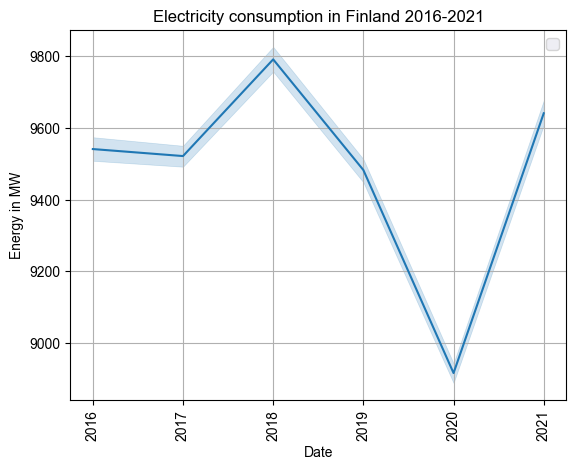

In [15]:
from matplotlib import style
fig = plt.figure()
axes1 = plt.subplot2grid((1,1), (0,0))

style.use("ggplot")
sns.lineplot(x= dataset["Year"], y= dataset["Consumption"], data = dataset)
sns.set(rc={'figure.figsize': (20,10)})

plt.title("Electricity consumption in Finland 2016-2021")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in axes1.xaxis.get_ticklabels():
    label.set_rotation(90)

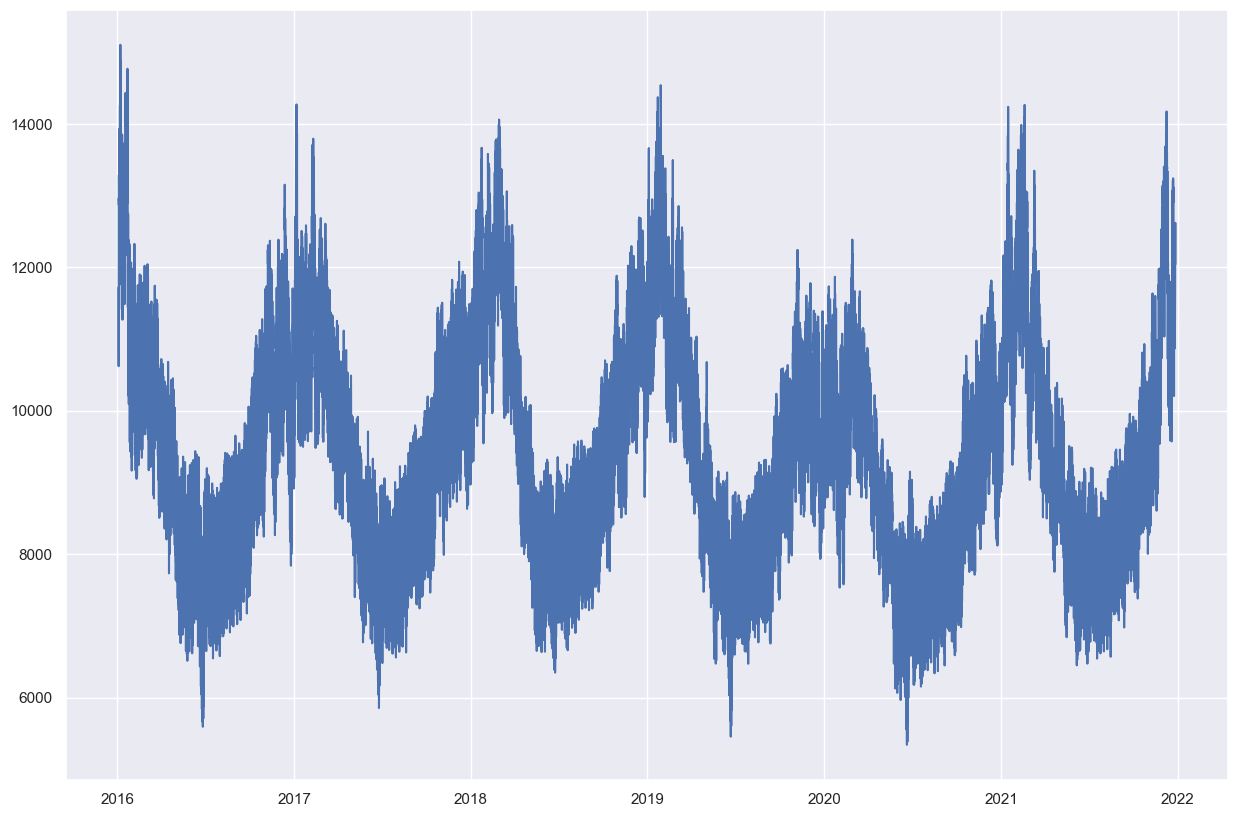

In [16]:
plt.figure(figsize=(15,10))
plt.plot(dataset["Consumption"])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


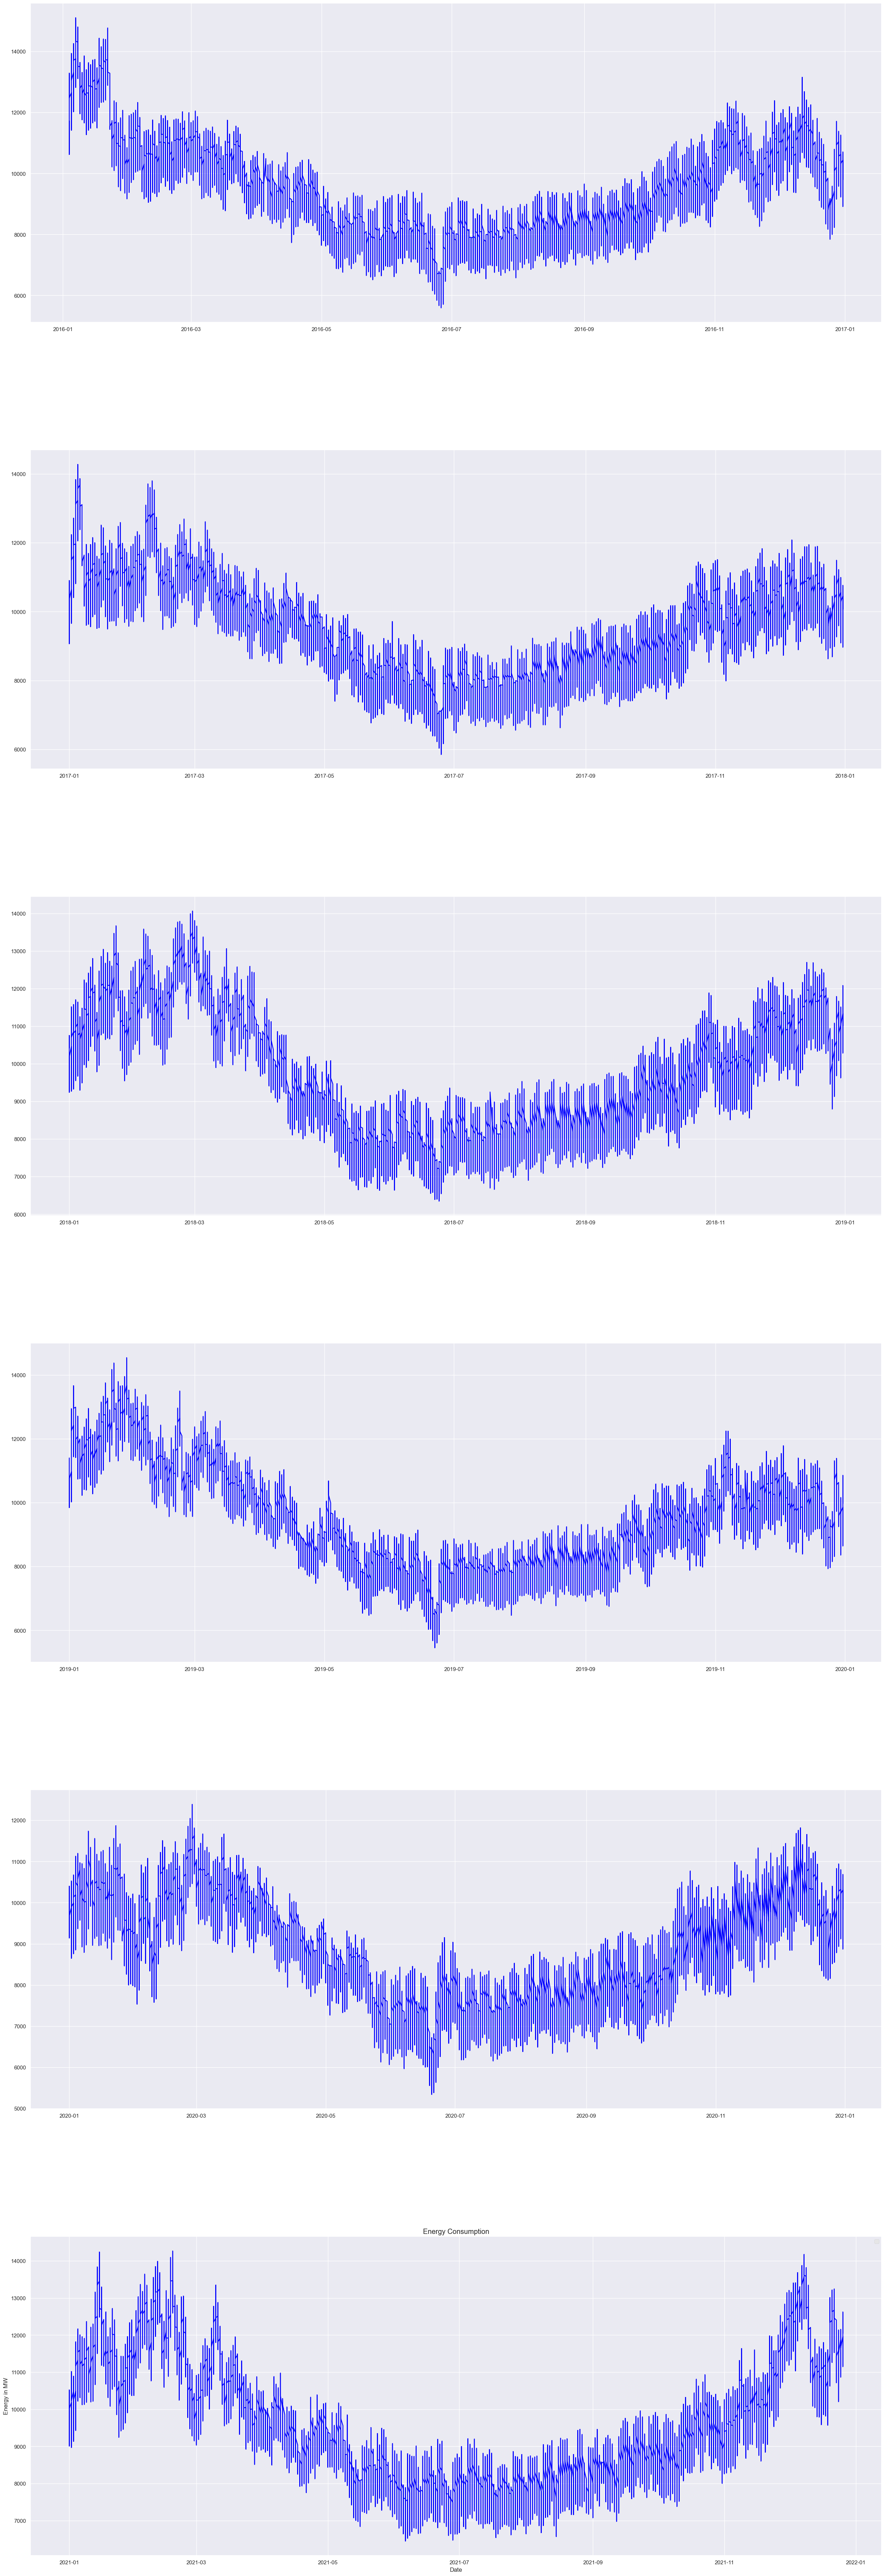

In [17]:
# Energy Consumption Each Year
from matplotlib import style

fig = plt.figure(figsize = (30,30))

ax1 = fig.add_subplot(611)
ax2 = fig.add_subplot(612)
ax3 = fig.add_subplot(613)
ax4 = fig.add_subplot(614)
ax5 = fig.add_subplot(615)
ax6 = fig.add_subplot(616)

style.use("ggplot")

y_2016 = dataset.loc["2016"]["Consumption"].to_list()
x_2016 = dataset.loc["2016"]["Date"].to_list()
ax1.plot(x_2016, y_2016, color= "blue", linewidth= 1.7)

y_2017 = dataset.loc["2017"]["Consumption"].to_list()
x_2017 = dataset.loc["2017"]["Date"].to_list()
ax2.plot(x_2017, y_2017, color= "blue", linewidth= 1.7)

y_2018 = dataset.loc["2018"]["Consumption"].to_list()
x_2018 = dataset.loc["2018"]["Date"].to_list()
ax3.plot(x_2018, y_2018, color= "blue", linewidth= 1.7)

y_2019 = dataset.loc["2019"]["Consumption"].to_list()
x_2019 = dataset.loc["2019"]["Date"].to_list()
ax4.plot(x_2019, y_2019, color= "blue", linewidth= 1.7)

y_2020 = dataset.loc["2020"]["Consumption"].to_list()
x_2020 = dataset.loc["2020"]["Date"].to_list()
ax5.plot(x_2020, y_2020, color= "blue", linewidth= 1.7)

y_2021 = dataset.loc["2021"]["Consumption"].to_list()
x_2021 = dataset.loc["2021"]["Date"].to_list()
ax6.plot(x_2021, y_2021, color= "blue", linewidth= 1.7)

plt.rcParams["figure.figsize"] = (30, 15)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=2.5, wspace=0.4, hspace=0.4)
plt.title("Energy Consumption")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

C:\Users\vk\AppData\Local\Temp\ipykernel_10832\1952416682.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Consumption"])


Text(0.5, 1.0, 'Energy Distribution')

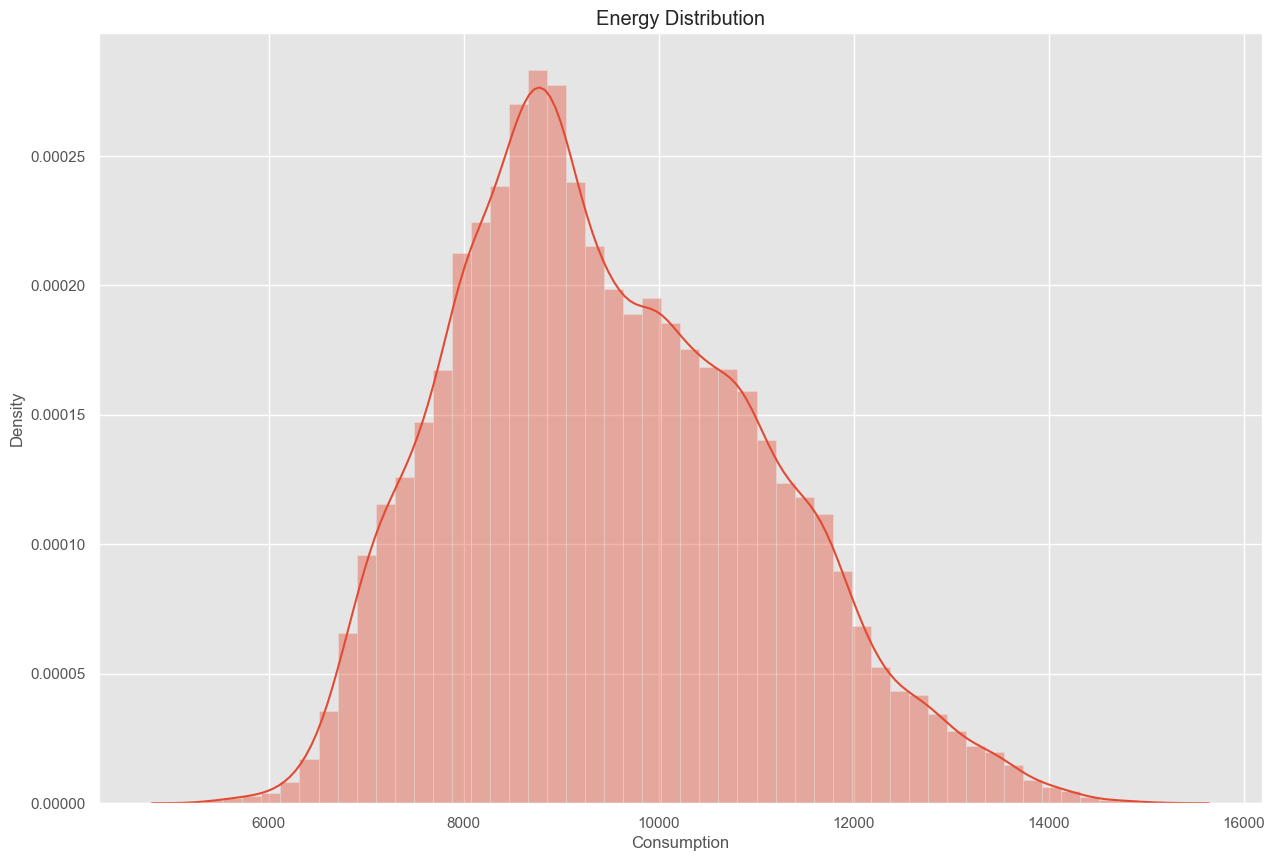

In [18]:
# Lets us see the Distribution off Energy Consumption so we have a idea about your Dataset a bit more
fig = plt.figure(figsize = (15,10))
sns.distplot(dataset["Consumption"])
plt.title("Energy Distribution")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


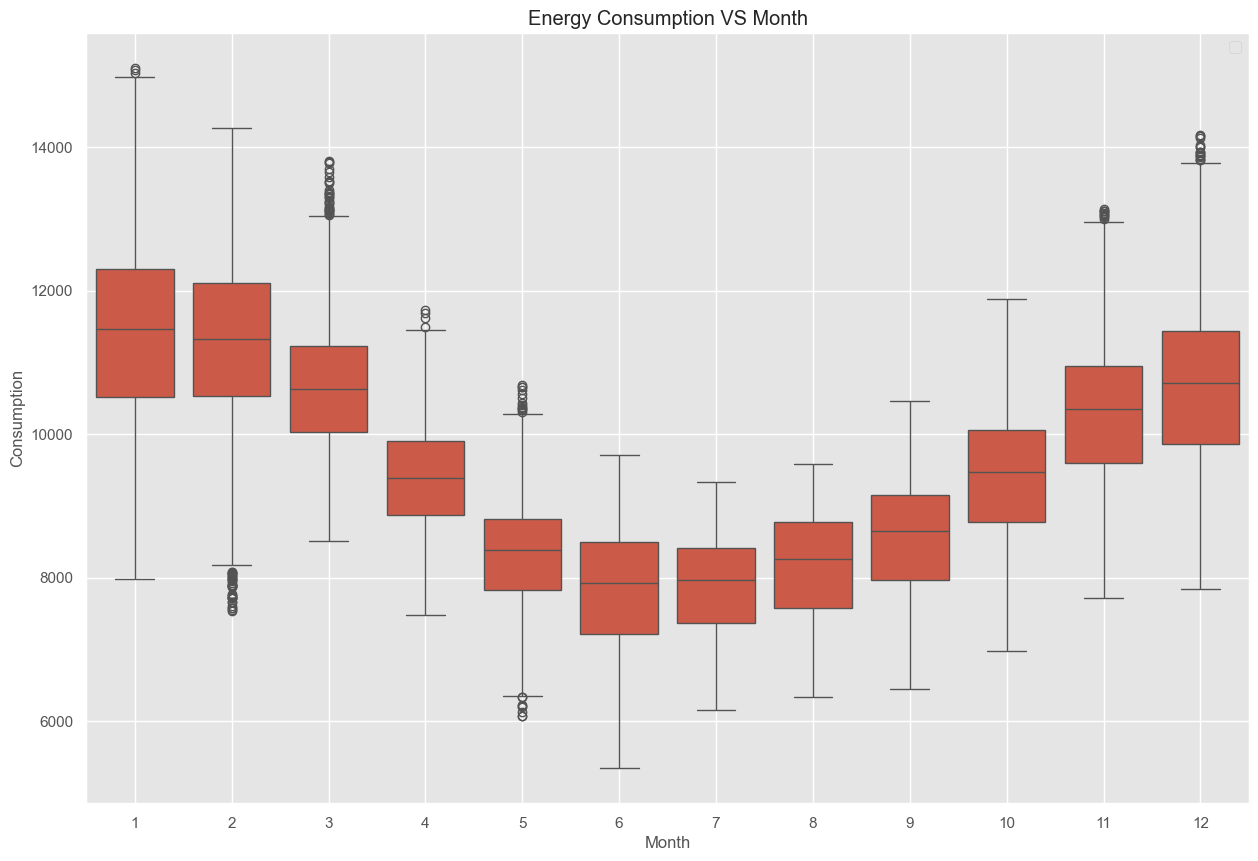

In [19]:
fig = plt.figure(figsize = (15,10))
sns.boxplot(x=dataset["Month"], y=dataset["Consumption"], data= df)
plt.title("Energy Consumption VS Month")
plt.xlabel("Month")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


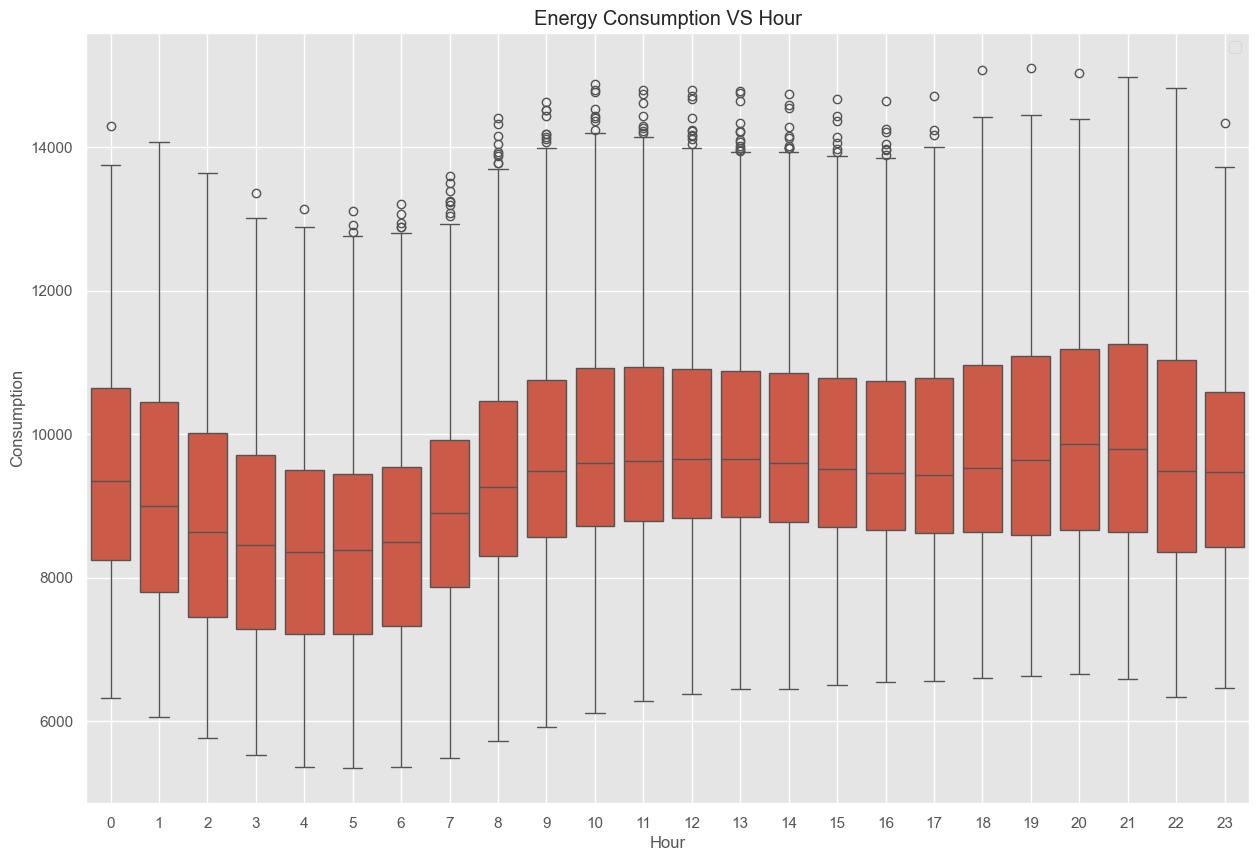

In [20]:
# Ensure that dataset1 is a copy of the dataset, not just a reference
dataset1 = dataset.copy()

# Plot the boxplot
fig = plt.figure(figsize=(15, 10))
sns.boxplot(x=dataset1.index.hour, y=dataset1['Consumption'], data=dataset1)
plt.title("Energy Consumption VS Hour")
plt.xlabel("Hour")
plt.grid(True, alpha=1)
plt.legend()  # Legend is not necessary for a boxplot

# Show the plot
plt.show()



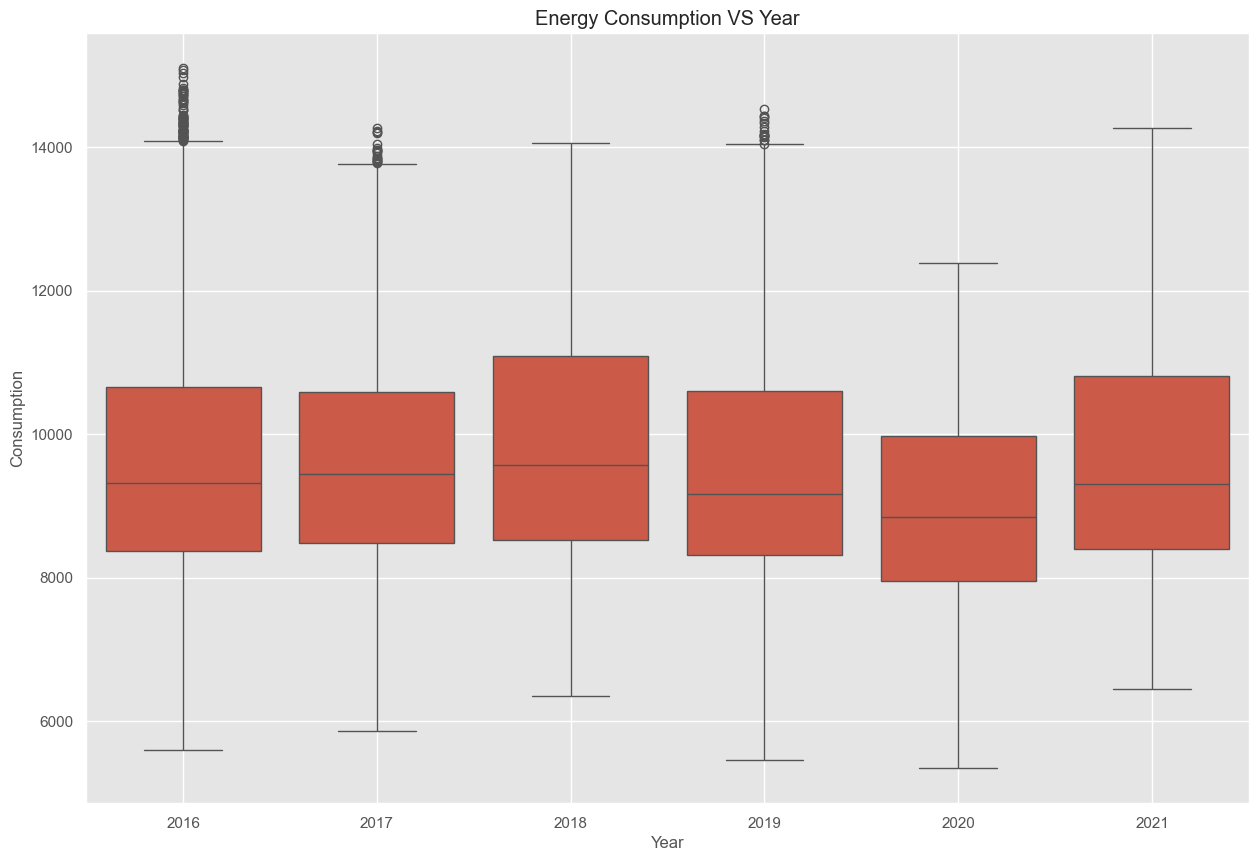

In [21]:
# Convert index to datetime index
dataset1.index = pd.to_datetime(dataset1.index)

# Plot the boxplot
fig = plt.figure(figsize=(15, 10))
sns.boxplot(x=dataset1.index.year, y=dataset1['Consumption'])
plt.title("Energy Consumption VS Year")
plt.xlabel("Year")
plt.grid(True, alpha=1)

# Show the plot
plt.show()




# LSTM Model

Train, Validation and Test dataset

In [22]:
newDataSet = dataset.resample("D").mean(numeric_only=True)


In [23]:
print("Old Dataset: ", dataset.shape)
print("New Dataset: ", newDataSet.shape)

Old Dataset:  (52774, 7)
New Dataset:  (2184, 4)


In [24]:
#new DataSet
newDataSet.head()

Consumption  Month    Year  Week
DateTime                                     
2016-01-04  12300.625000    1.0  2016.0   1.0
2016-01-05  12945.375000    1.0  2016.0   1.0
2016-01-06  13192.750000    1.0  2016.0   1.0
2016-01-07  14243.541667    1.0  2016.0   1.0
2016-01-08  14121.666667    1.0  2016.0   1.0

In [25]:
y = newDataSet["Consumption"]
print(y[0])
y.shape

12300.625


C:\Users\vk\AppData\Local\Temp\ipykernel_10832\3252378364.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(y[0])


(2184,)

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

y = scaler.fit_transform(np.array(y).reshape(-1,1))
print("Normalizing data before model fitting")
print(y[:10])

Normalizing data before model fitting
[[0.75916744]
 [0.83908687]
 [0.86975003]
 [1.        ]
 [0.98489309]
 [0.82500258]
 [0.78623593]
 [0.83189672]
 [0.80348621]
 [0.8313604 ]]


In [27]:
training_size = int(len(y)*0.80)
test_size = len(y)- training_size
val_size = int(training_size*0.20)
train_data , test_data , val_data = y[0:training_size-val_size,:] , y[training_size:len(y),:1], y[len(y)-test_size-val_size:len(y)-test_size,:1]

In [28]:
# building input variable
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [] , []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return np.array(dataX), np.array(dataY)

In [29]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
X_val, yval = create_dataset(val_data, time_step)

In [30]:
# reshape train and input-output pairs
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1],1)

print("X_train shape: ", X_train.shape)
print("X_test shape: ",X_test.shape)
print("X_val shape: ",X_val.shape)

X_train shape:  (1297, 100, 1)
X_test shape:  (336, 100, 1)
X_val shape:  (248, 100, 1)


Model Structure

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import Sequential
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (time_step, 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))

model.add(LSTM(units = 50, return_sequences = True))

model.add(LSTM(units = 50))

model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

c:\Users\vk\Desktop\Puton\keras\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

Model Training

In [33]:
history = model.fit(X_train, y_train, validation_data = (X_val,yval), verbose = 1,epochs = 60 ,batch_size = 20)

Epoch 1/60


65/65 ━━━━━━━━━━━━━━━━━━━━ 30s 209ms/step - loss: 0.0370 - val_loss: 0.0045
Epoch 2/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 14s 208ms/step - loss: 0.0072 - val_loss: 0.0052
Epoch 3/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - loss: 0.0079 - val_loss: 0.0038
Epoch 4/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - loss: 0.0079 - val_loss: 0.0038
Epoch 5/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 15s 234ms/step - loss: 0.0068 - val_loss: 0.0039
Epoch 6/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 189ms/step - loss: 0.0069 - val_loss: 0.0039
Epoch 7/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 207ms/step - loss: 0.0063 - val_loss: 0.0037
Epoch 8/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - loss: 0.0056 - val_loss: 0.0032
Epoch 9/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 178ms/step - loss: 0.0048 - val_loss: 0.0033
Epoch 10/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - loss: 0.0050 - val_loss: 0.0042
Epoch 11/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 184ms/step - loss: 0.0049 - val_loss: 0.0033
Epoch 12/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 19s 157ms/step

Model Evaluating

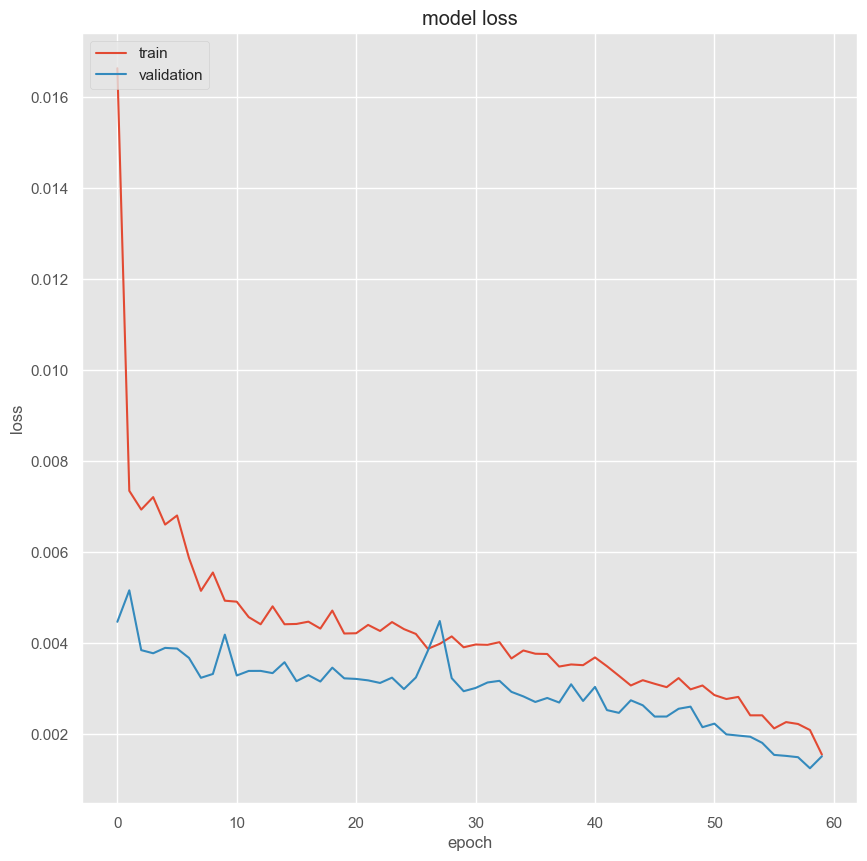

In [34]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss']) # tb
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [35]:
import tensorflow as tf
tf.__version__

'2.16.0-rc0'

In [36]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
val_predict=model.predict(X_val)

41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


In [37]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
val_predict=scaler.inverse_transform(val_predict)

In [38]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

9358.475555777693

In [39]:
print(train_predict.shape)
print(test_predict.shape)
print(val_predict.shape)
print(train_predict[0])
print(y_train.shape)

(1297, 1)
(336, 1)
(248, 1)
[9164.428]
(1297,)


Conclusion For LSTM Model

In [40]:
# Predicting consumption using training data
train_predictions = model.predict(X_train)
train_predictions =scaler.inverse_transform(train_predictions)

y_train = y_train.reshape(y_train.shape[0], 1)
actual = scaler.inverse_transform(y_train)
train_results = pd.DataFrame()

train_results["Train Predictions"] = train_predictions.tolist()
train_results["Actuals"] = actual.tolist()

train_results

 7/41 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step


Train Predictions               Actuals
0      [9164.427734375]   [9406.708333333334]
1     [9321.2958984375]   [9614.791666666666]
2     [9390.3291015625]   [9894.708333333334]
3     [9186.6533203125]   [8933.708333333334]
4     [8358.6630859375]   [8557.208333333334]
...                 ...                   ...
1292         [8514.875]   [9259.666666666666]
1293  [9625.9970703125]             [10248.5]
1294    [10265.6171875]  [10360.333333333334]
1295   [10198.61328125]  [10489.833333333334]
1296  [10441.814453125]             [10204.5]

[1297 rows x 2 columns]

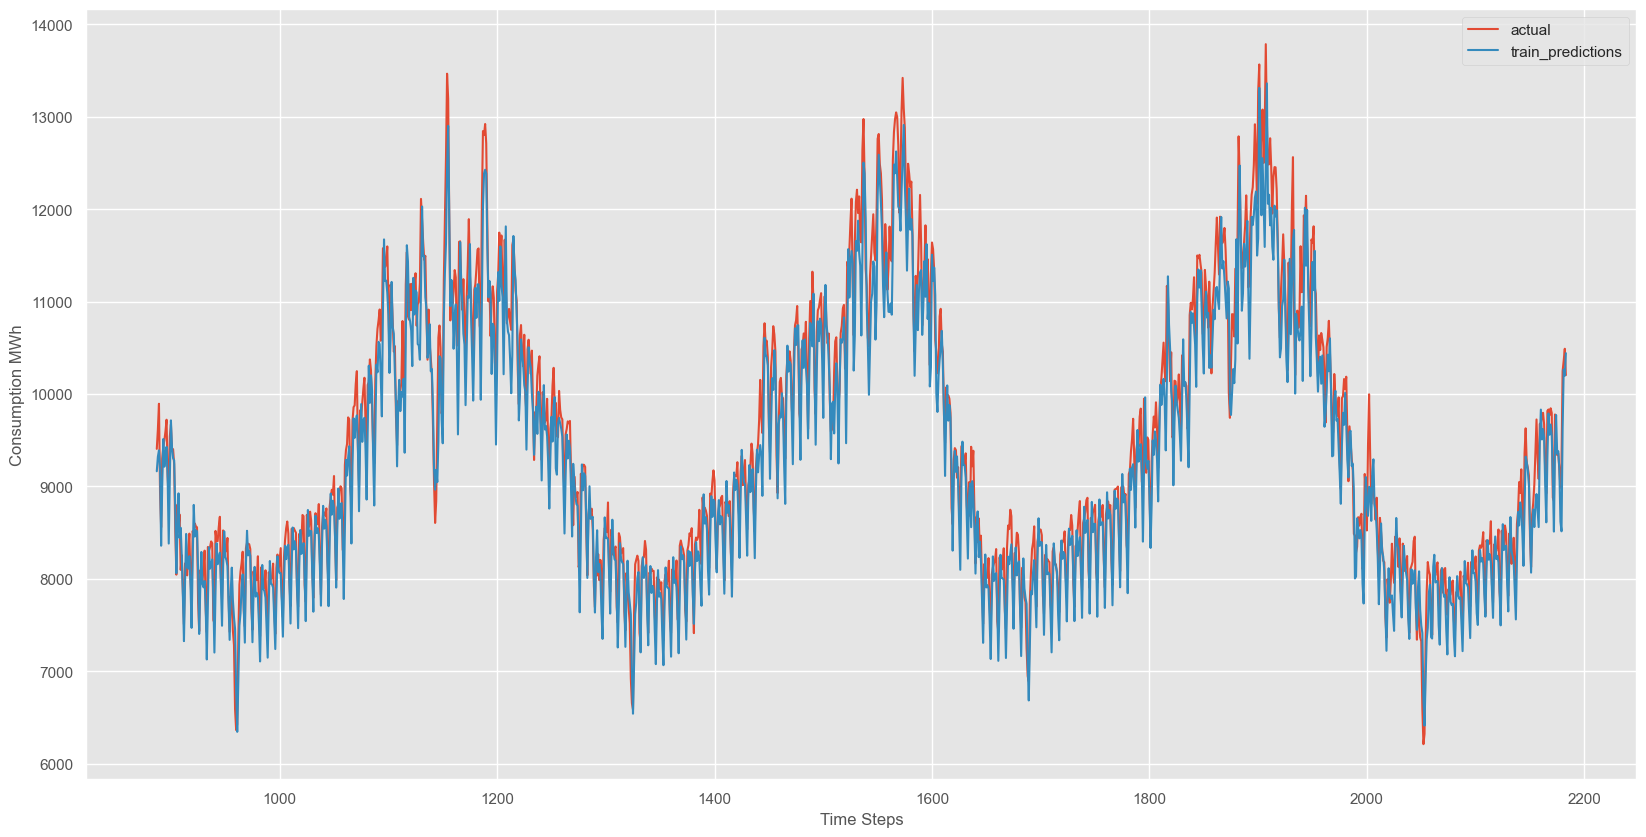

In [41]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y )
ActualPlot[:, :] = np.nan
ActualPlot[887:, :] = actual.tolist()
plt.plot(ActualPlot)

TrainPredictionsPlot = np.empty_like(y )
TrainPredictionsPlot[:, :] = np.nan
TrainPredictionsPlot[887:, :] = train_predictions.tolist()
plt.plot(TrainPredictionsPlot)

plt.legend(['actual','train_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')
plt.show()

In [42]:
# Predicting consumption using validation data
val_predictions = model.predict(X_val)
val_predictions =scaler.inverse_transform(val_predictions)

yval = yval.reshape(yval.shape[0], 1)
actual_val = scaler.inverse_transform(yval)

val_results = pd.DataFrame()
val_results["Val Predictions"] = val_predictions.tolist()
val_results["Actuals_val"] = actual_val.tolist()

val_results

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


Val Predictions           Actuals_val
0     [9251.4072265625]            [8931.875]
1        [9531.7109375]   [9112.916666666666]
2       [9095.79296875]  [10019.416666666666]
3      [9728.900390625]           [10390.375]
4    [10214.9423828125]  [10802.916666666666]
..                  ...                   ...
243  [8061.02294921875]   [8020.541666666667]
244    [7538.833984375]             [7921.75]
245  [8143.97900390625]   [8705.041666666666]
246    [8771.892578125]   [8824.708333333334]
247       [8600.765625]            [9062.375]

[248 rows x 2 columns]

Text(0, 0.5, 'Consumption MWh')

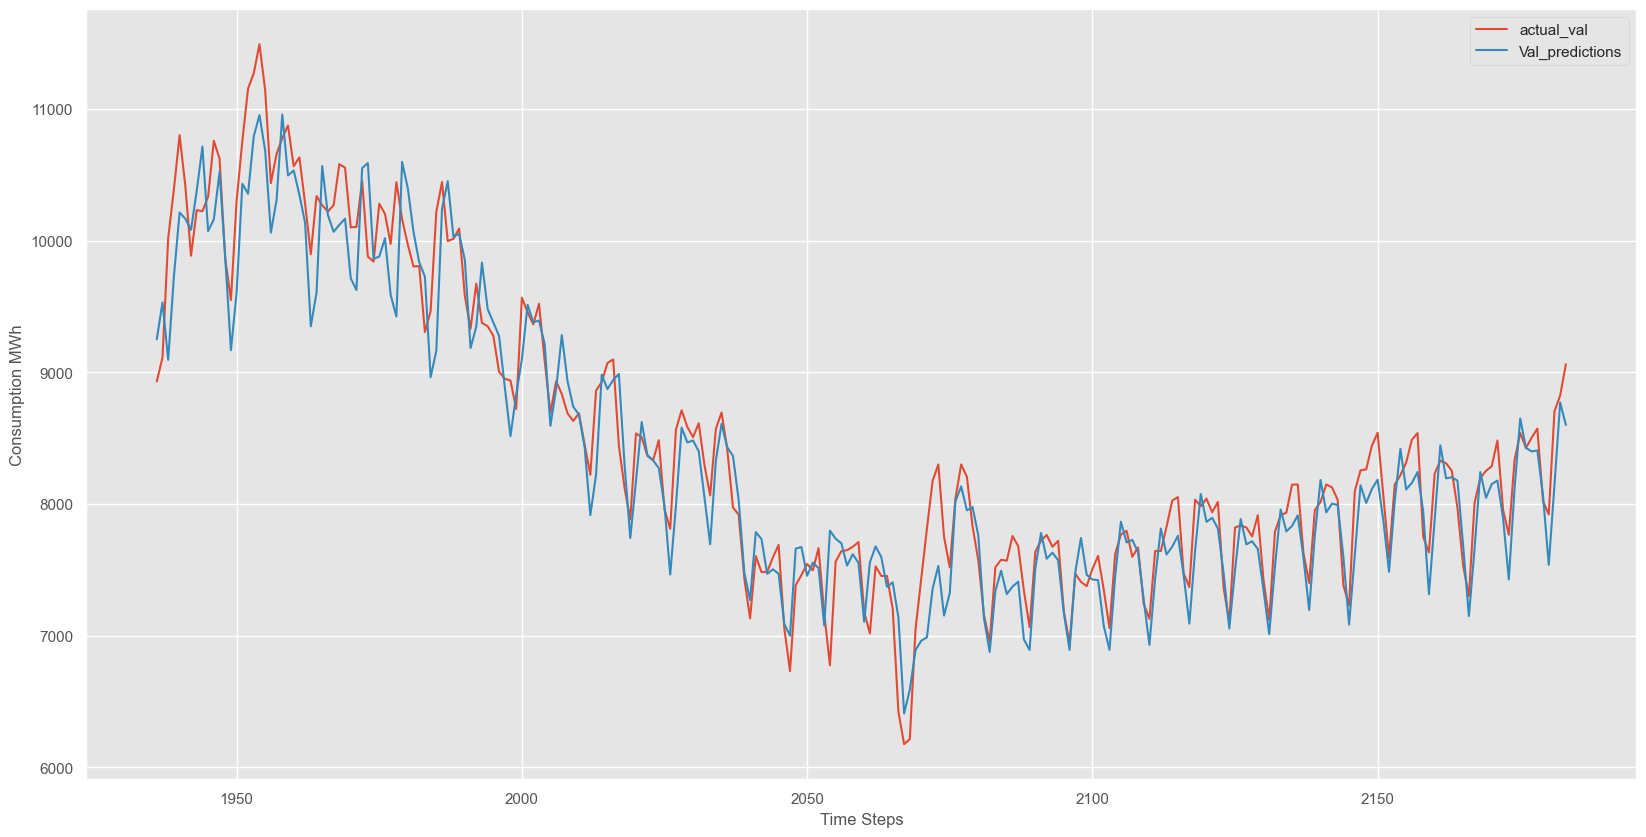

In [43]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[1936:, :] = actual_val.tolist()
plt.plot(ActualPlot)

# Validation Prediction
ValPredictionsPlot = np.empty_like(y)
ValPredictionsPlot[:, :] = np.nan
ValPredictionsPlot[1936:, :] = val_predictions.tolist()
plt.plot(ValPredictionsPlot)

plt.legend(['actual_val','Val_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')

In [89]:
# Predicting consumption using test data
test_predictions = model.predict(X_test)
test_predictions =scaler.inverse_transform(test_predictions)

ytest = ytest.reshape(ytest.shape[0], 1)
actual_test = scaler.inverse_transform(ytest)

test_results = pd.DataFrame()
test_results["test Predictions"] = test_predictions.tolist()
test_results["Actuals_test"] = actual_test.tolist()

test_results

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


test Predictions          Actuals_test
0      [9851.958984375]  [10032.541666666666]
1     [10169.255859375]           [10732.125]
2      [10846.33203125]  [10733.583333333334]
3      [10386.54296875]           [10971.875]
4    [10724.6865234375]  [11227.791666666666]
..                  ...                   ...
331  [12347.9013671875]            [12540.25]
332  [12214.9951171875]  [12635.958333333334]
333   [12397.099609375]  [11684.333333333334]
334     [10946.7890625]  [11384.166666666666]
335     [10717.5234375]           [11581.625]

[336 rows x 2 columns]

Text(0, 0.5, 'Consumption MWh')

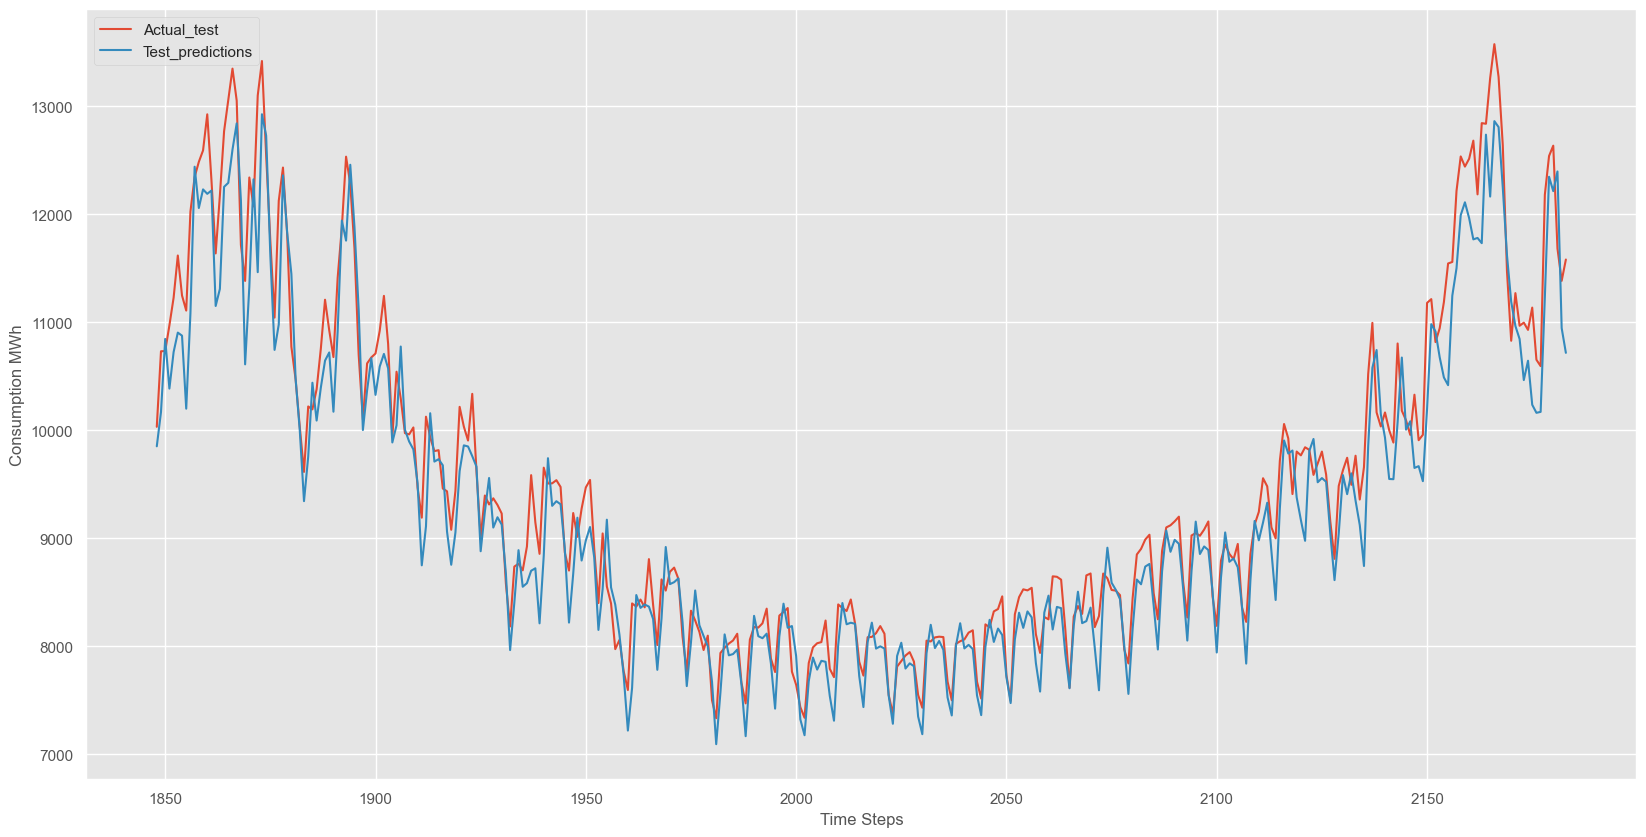

In [45]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[1848:, :] = actual_test.tolist()
plt.plot(ActualPlot)

# Test Prediction
TestPredictionsPlot = np.empty_like(y)
TestPredictionsPlot[:, :] = np.nan
TestPredictionsPlot[1848:, :] = test_predictions.tolist()
plt.plot(TestPredictionsPlot)

plt.legend(['Actual_test','Test_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')

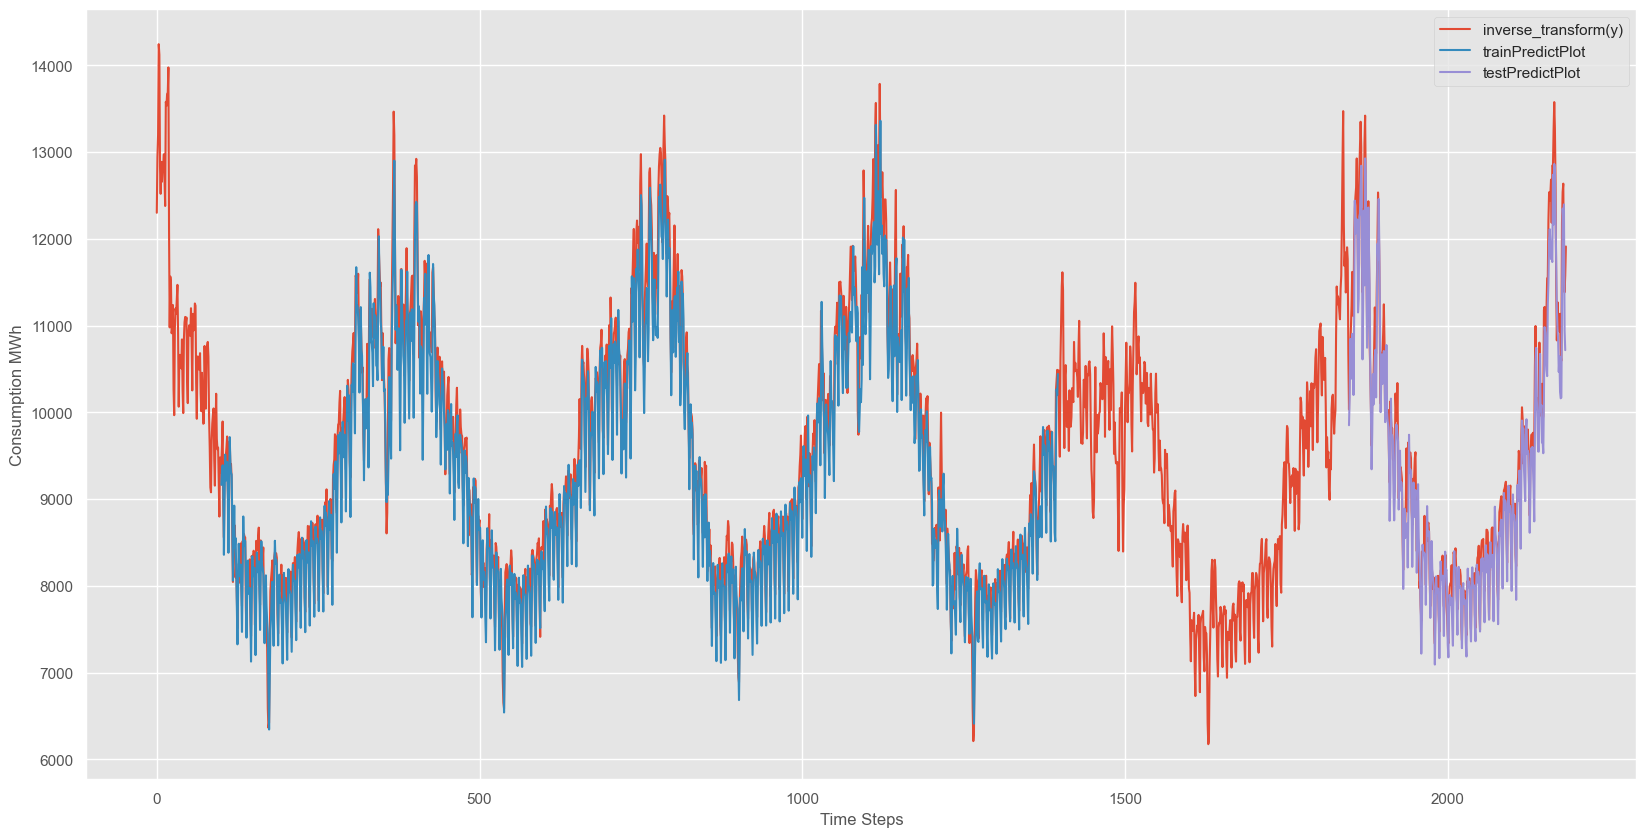

In [46]:
look_back=100
fig, ax = plt.subplots(figsize=(20,10))
trainPredictPlot = np.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(y)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1+349:len(y)-1, :] = test_predict

plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['inverse_transform(y)','trainPredictPlot','testPredictPlot'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')
plt.show()

MSE For LSTM Model

In [47]:
mse_lstm = mean_squared_error(actual_test, test_predictions)
accuracy_lstm = 1 - mse_lstm / np.var(actual_test)

Accuracy For LSTM Model

In [48]:
print("Mean Squared Error (LSTM):", mse_lstm)
print("Accuracy (LSTM):", accuracy_lstm)

Mean Squared Error (LSTM): 153054.27952821428
Accuracy (LSTM): 0.9347573605517


Summary of LSTM

In [49]:
mse_lstm = mean_squared_error(actual_test, test_predictions)
mae_lstm = mean_absolute_error(actual_test, test_predictions)
r2_lstm = r2_score(actual_test, test_predictions)

In [50]:
r2_lstm = r2_score(actual_test, test_predictions)
print("LSTM Model:")
print("Mean Squared Error (MSE):", mse_lstm)
print("Mean Absolute Error (MAE):", mae_lstm)
print("R-squared (R2):", r2_lstm)

LSTM Model:
Mean Squared Error (MSE): 153054.27952821428
Mean Absolute Error (MAE): 299.08105032784596
R-squared (R2): 0.9347573605517


In [51]:
# Assuming you've trained and compiled your LSTM model
model_lstm = Sequential()
# ... (model architecture and training code)

# Save the model
model_lstm.save('model.h5')

# Deep LSTM

In [52]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Define the model architecture
model_lstm_deep = Sequential()

# Add the first LSTM layer with return sequences
model_lstm_deep.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))

# Add the second LSTM layer with return sequences
model_lstm_deep.add(LSTM(units=50, return_sequences=True))

# Add the third LSTM layer without return sequences
model_lstm_deep.add(LSTM(units=50))

# Add the output layer
model_lstm_deep.add(Dense(units=1))

# Compile the model
model_lstm_deep.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_lstm_deep.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
y_pred_lstm_deep = model_lstm_deep.predict(X_test)

# Reshape predictions for compatibility with evaluation metrics
y_pred_lstm_deep = y_pred_lstm_deep.reshape(-1, 1)


c:\Users\vk\Desktop\Puton\keras\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100


41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 123ms/step - loss: 0.0582
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 0.0068
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - loss: 0.0060
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - loss: 0.0062
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - loss: 0.0059
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - loss: 0.0062
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - loss: 0.0058
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0052
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0055
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - loss: 0.0058
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - loss: 0.0050
Epoch 12/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0046
Epoch 13/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 0.0045
Epoch 14/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0049
Epoch 15/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step 

Plotting Comaprision between using LSTM and Deep LSTM

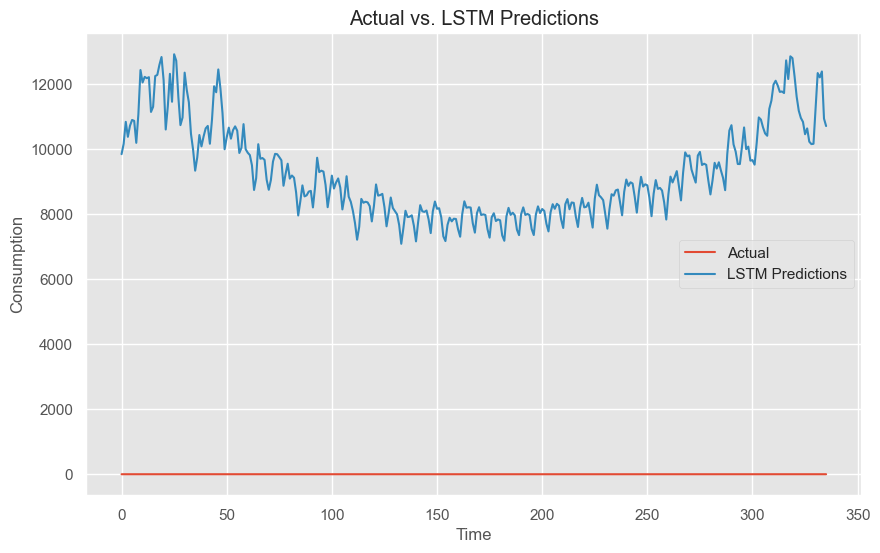

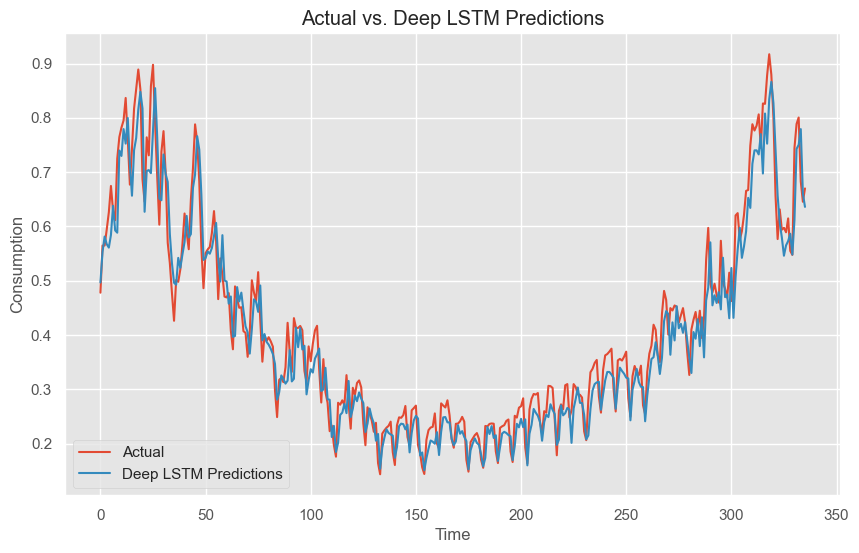

In [53]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values for LSTM model
plt.figure(figsize=(10, 6))
plt.plot(ytest, label='Actual')
plt.plot(test_predictions, label='LSTM Predictions')
plt.title('Actual vs. LSTM Predictions')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend()
plt.show()

# Plot actual vs. predicted values for deep LSTM model
plt.figure(figsize=(10, 6))
plt.plot(ytest, label='Actual')
plt.plot(y_pred_lstm_deep, label='Deep LSTM Predictions')
plt.title('Actual vs. Deep LSTM Predictions')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend()
plt.show()


MSE of Deep LSTM 

In [54]:
from sklearn.metrics import mean_squared_error

# Calculating Mean Squared Error (MSE)
mse_deep_lstm = mean_squared_error(actual_test, test_predictions)
print("Mean Squared Error (Deep LSTM):", mse_deep_lstm)

Mean Squared Error (Deep LSTM): 153054.27952821428


Accuracy Of Deep LSTM

In [55]:
from sklearn.metrics import r2_score

# Calculating R-squared (R2) score
r2_deep_lstm = r2_score(actual_test, test_predictions)
print("R-squared (R2) Score (Deep LSTM):", r2_deep_lstm)

R-squared (R2) Score (Deep LSTM): 0.9347573605517


# RandomForest Model

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [57]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

Reshape data for RandomForest

In [58]:
# Reshape data for RandomForestRegressor
X_train_rf = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test_rf = X_test.reshape(X_test.shape[0], X_test.shape[1])

Train RandomForest Model

In [59]:
# Train Random Forest model
rf_model.fit(X_train_rf, y_train)

c:\Users\vk\Desktop\Puton\keras\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

Prediction using RandomForest Model

In [60]:
# Predict using Random Forest model
y_pred_rf = rf_model.predict(X_test_rf)
y_pred_rf = scaler.inverse_transform(y_pred_rf.reshape(-1, 1))

Ensemble Prediction

In [61]:
# Ensemble Predictions (average of LSTM and Random Forest)
y_pred_ensemble = (test_predictions + y_pred_rf) / 2

# Plotting Result Between LSTM And RandomForest

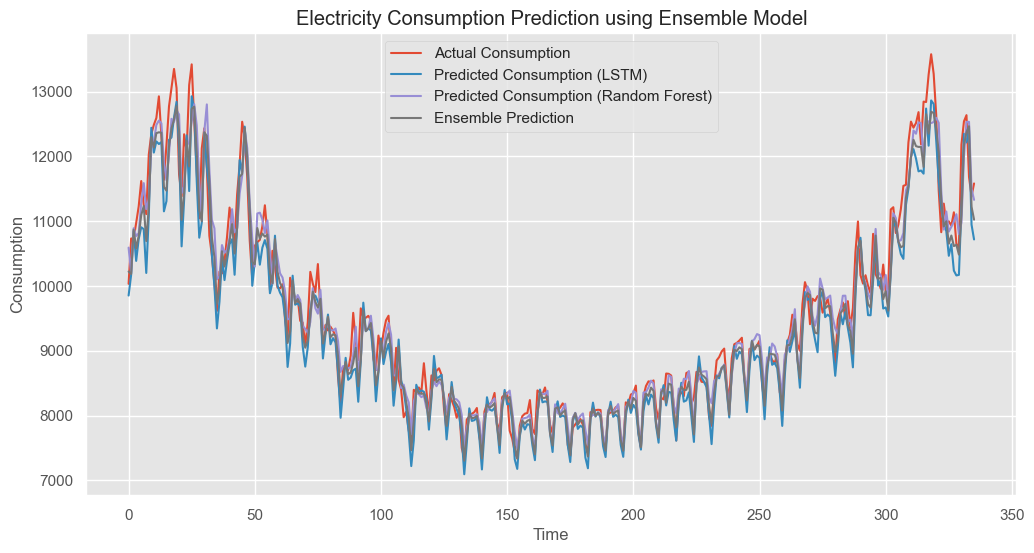

In [62]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(actual_test, label='Actual Consumption')
plt.plot(test_predictions, label='Predicted Consumption (LSTM)')
plt.plot(y_pred_rf, label='Predicted Consumption (Random Forest)')
plt.plot(y_pred_ensemble, label='Ensemble Prediction')
plt.title('Electricity Consumption Prediction using Ensemble Model')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend()
plt.show()

MSE For RandomForest

In [63]:
mse_rf = mean_squared_error(actual_test, y_pred_rf)
accuracy_rf = 1 - mse_rf / np.var(actual_test)

Accuracy For RandomForest

In [64]:
print("\nMean Squared Error (Random Forest):", mse_rf)
print("Accuracy (Random Forest):", accuracy_rf)


Mean Squared Error (Random Forest): 123077.7277138529
Accuracy (Random Forest): 0.9475355028418484


Summary of RandomForest

In [65]:
mse_rf = mean_squared_error(actual_test, y_pred_rf)
mae_rf = mean_absolute_error(actual_test, y_pred_rf)

In [66]:
r2_rf = r2_score(actual_test, y_pred_rf)
print("\nRandom Forest Model:")
print("Mean Squared Error (MSE):", mse_rf)
print("Mean Absolute Error (MAE):", mae_rf)
print("R-squared (R2):", r2_rf)


Random Forest Model:
Mean Squared Error (MSE): 123077.7277138529
Mean Absolute Error (MAE): 256.38071899115573
R-squared (R2): 0.9475355028418484


# RandomForest With Fuzzy System

In [163]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from fuzzywuzzy import fuzz
import numpy as np
from sklearn.model_selection import train_test_split

In [164]:
# Example reference values for fuzzy matching
reference_values = [10, 20, 30, 40, 50]

In [165]:
# Define fuzzy transformation function
def fuzzy_transform(x):
    # Example fuzzy transformation function
    scores = [fuzz.ratio(str(x[i]), str(ref)) for i in range(len(x)) for ref in reference_values]
    return scores

In [166]:
# Fuzzify the input data
X_train_fuzzy = np.array([fuzzy_transform(row) for row in X_train.values])
X_test_fuzzy = np.array([fuzzy_transform(row) for row in X_test.values])

In [167]:
# Train a Random Forest model using the fuzzy inputs
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_fuzzy, y_train)

RandomForestRegressor(random_state=42)

In [168]:
# Make predictions using the Random Forest model
train_predictions = rf_model.predict(X_train_fuzzy)
test_predictions = rf_model.predict(X_test_fuzzy)

In [169]:
# Evaluate the performance of the Random Forest model
mse_train = mean_squared_error(y_train, train_predictions)
mse_test = mean_squared_error(y_test, test_predictions)

In [170]:
print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Test):", mse_test)

Mean Squared Error (Train): 624875.5619047685
Mean Squared Error (Test): 692694.0727611115


In [171]:
# Calculate R2 score for the fuzzy model
r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, test_predictions)

In [172]:
print("R2 Score (Train):", r2_train)
print("R2 Score (Test):", r2_test)

R2 Score (Train): 0.7477517836833383
R2 Score (Test): 0.7243784606682923


In [173]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

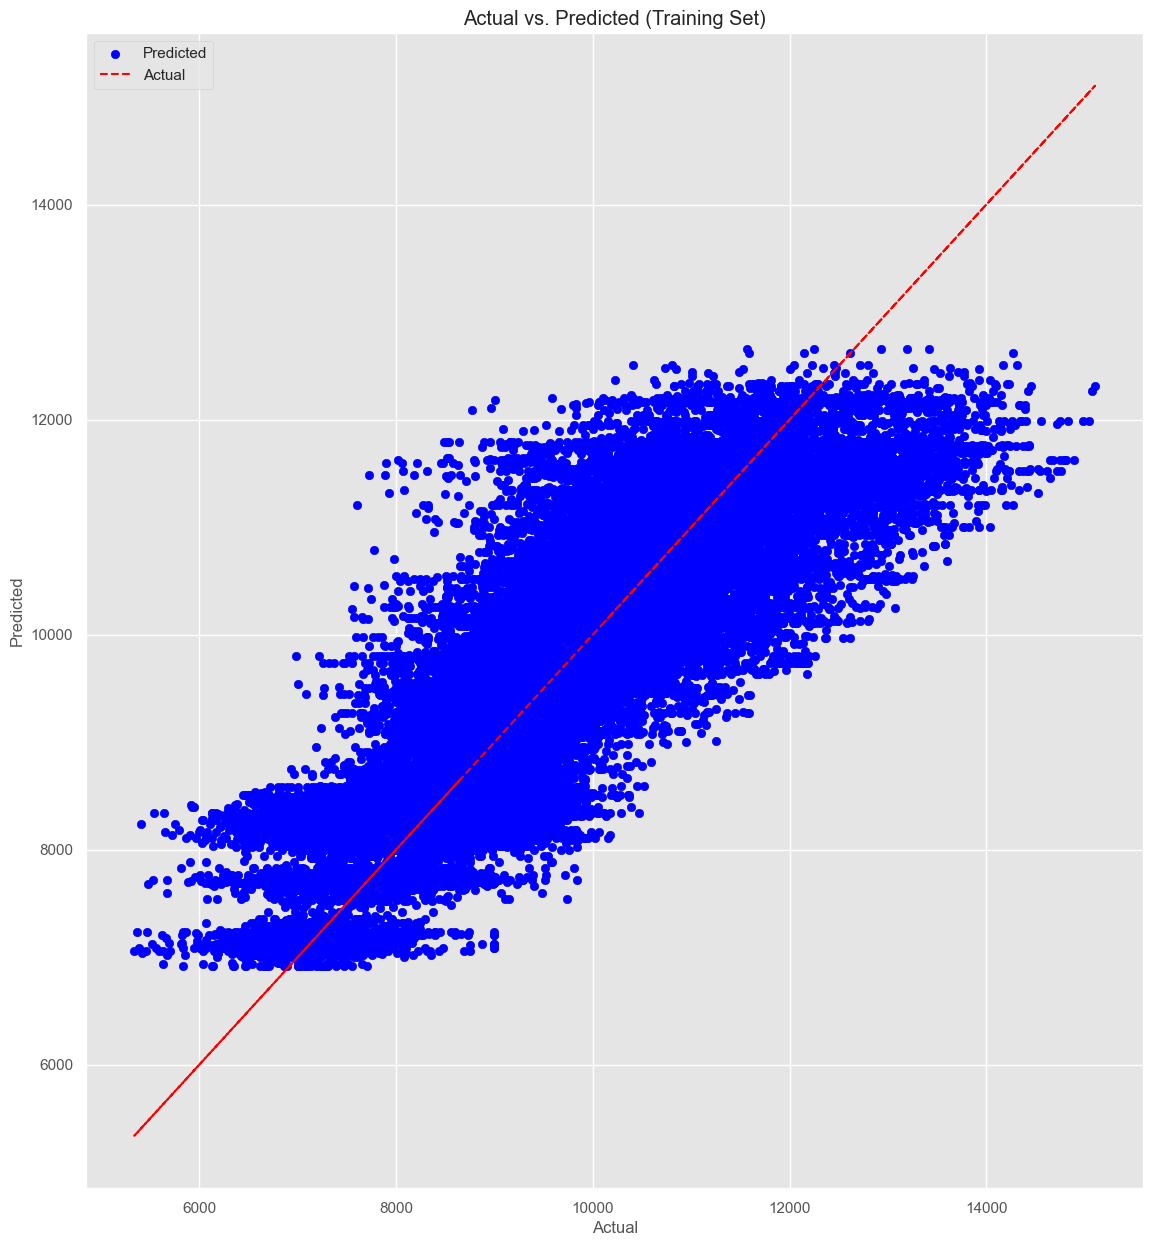

In [174]:
# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, train_predictions, color='blue', label='Predicted')
plt.plot(y_train, y_train, color='red', linestyle='--', label='Actual')
plt.title('Actual vs. Predicted (Training Set)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

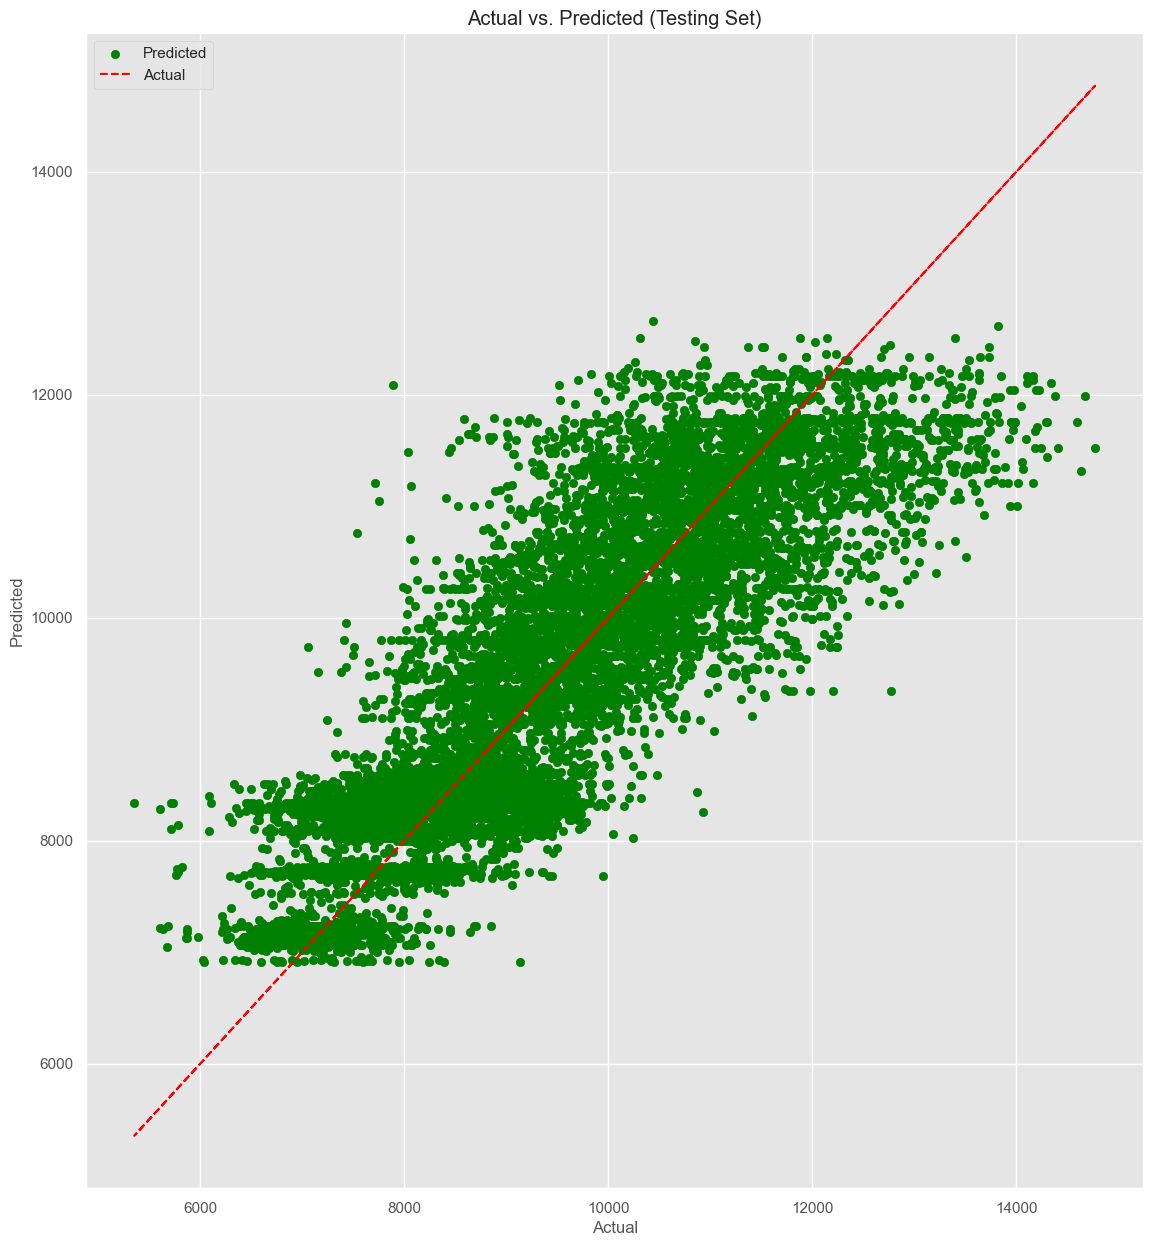

In [175]:
# Testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, test_predictions, color='green', label='Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Actual')
plt.title('Actual vs. Predicted (Testing Set)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

In [112]:
plt.tight_layout()
plt.show()

<Figure size 3000x1500 with 0 Axes>

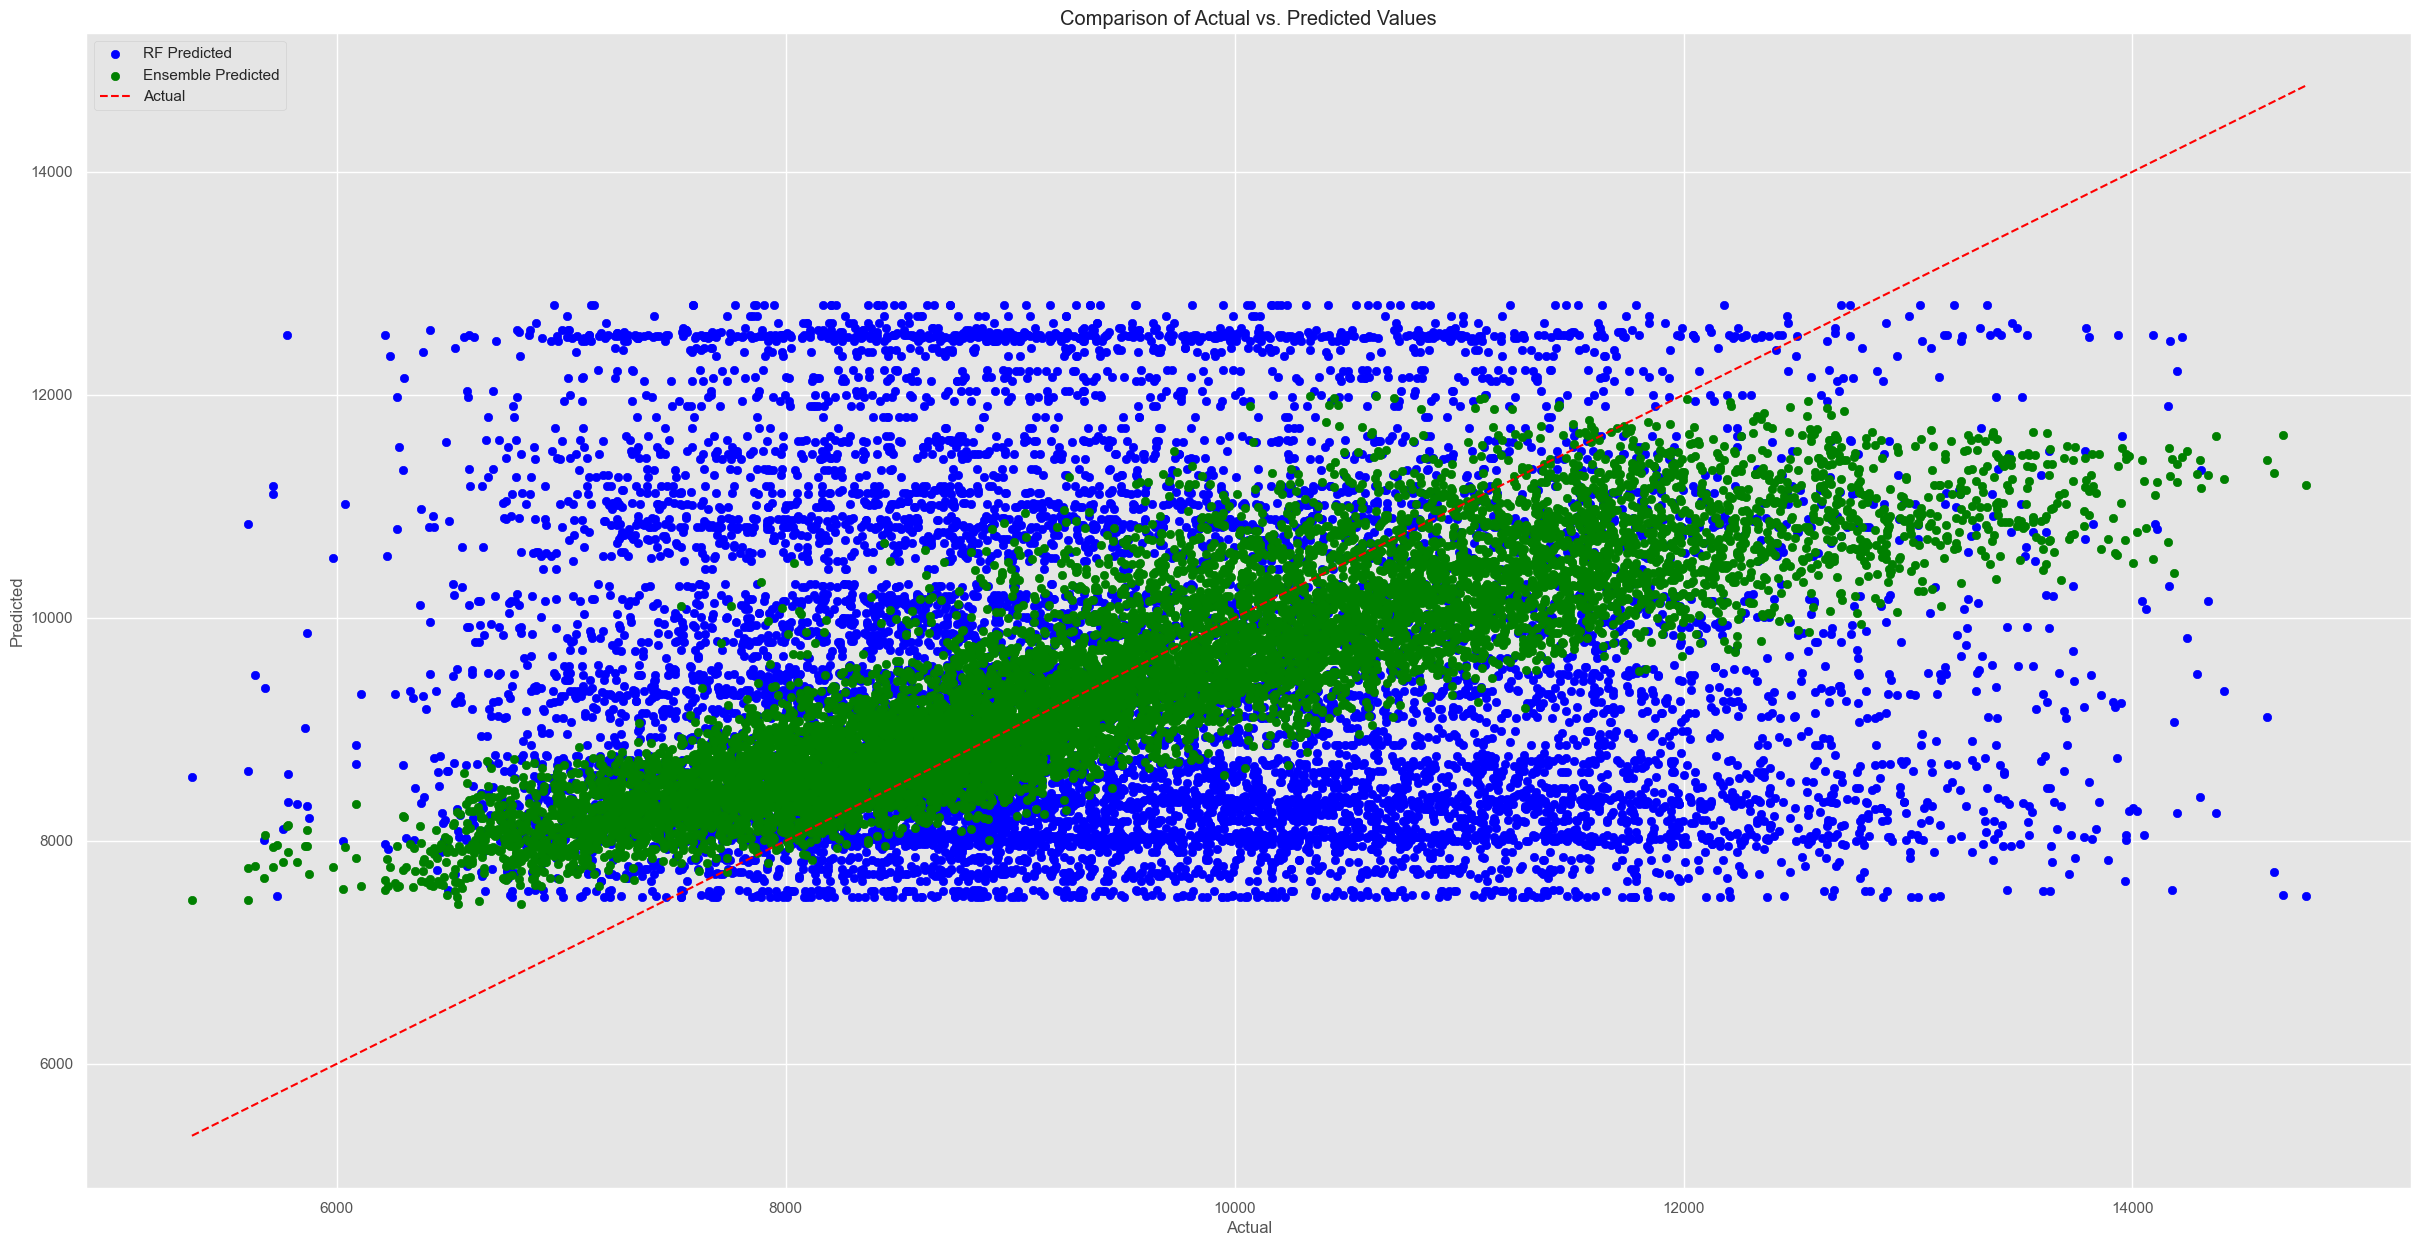

In [176]:
# Ensure that the predicted arrays have the same size as y_test
y_pred_rf_resized = np.concatenate([y_pred_rf] * (len(y_test) // len(y_pred_rf)) + [y_pred_rf[:len(y_test) % len(y_pred_rf)]])
y_pred_ensemble_resized = np.concatenate([y_pred_ensemble] * (len(y_test) // len(y_pred_ensemble)) + [y_pred_ensemble[:len(y_test) % len(y_pred_ensemble)]])

# Create a scatter plot for Random Forest model
plt.scatter(y_test, y_pred_rf_resized, color='blue', label='RF Predicted')

# Create a scatter plot for the ensemble predictions
plt.scatter(y_test, y_pred_ensemble_resized, color='green', label='Ensemble Predicted')

# Plot the line y=x for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Actual')

# Set labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Comparison of Actual vs. Predicted Values')
plt.legend()

# Show plot
plt.show()


 # Support Vector Regressor (SVR)

In [117]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [118]:
# Support Vector Regressor (SVR) Model
svr_model = SVR(kernel='rbf')

Reshape Data For SVR Model

In [119]:
# Reshape data for SVR model
X_train_svr = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test_svr = X_test.reshape(X_test.shape[0], X_test.shape[1])

Train SVR Model

In [121]:
# Train SVR model
svr_model.fit(X_train_svr, y_train.ravel())

SVR()

Prediction through SVR Model

In [122]:
# Predict using SVR model
y_pred_svr = svr_model.predict(X_test_svr)
y_pred_svr = y_pred_svr.reshape(-1, 1)
y_pred_svr = scaler.inverse_transform(y_pred_svr)

In [123]:
# Ensemble Predictions (average of LSTM and Random Forest)
y_pred_ensemble = (test_predictions + y_pred_rf + y_pred_svr) / 3

MSE For SVR

In [124]:
# Evaluate the ensemble model
mse_ensemble = mean_squared_error(actual_test, y_pred_ensemble)
print("Mean Squared Error (Ensemble):", mse_ensemble)

Mean Squared Error (Ensemble): 144101.74296090438


In [125]:
mse_svr = mean_squared_error(actual_test, y_pred_svr)
accuracy_svr = 1 - mse_svr / np.var(actual_test)

Accuracy For SVR

In [126]:
print("\nMean Squared Error (SVR):", mse_svr)
print("Accuracy (SVR):", accuracy_svr)


Mean Squared Error (SVR): 363356.24194437294
Accuracy (SVR): 0.8451116796110499


Summary of SVR

In [127]:
mse_svr = mean_squared_error(actual_test, y_pred_svr)
mae_svr = mean_absolute_error(actual_test, y_pred_svr)

In [128]:
r2_svr = r2_score(actual_test, y_pred_svr)
print("\nSVR Model:")
print("Mean Squared Error (MSE):", mse_svr)
print("Mean Absolute Error (MAE):", mae_svr)
print("R-squared (R2):", r2_svr)


SVR Model:
Mean Squared Error (MSE): 363356.24194437294
Mean Absolute Error (MAE): 429.73235736252207
R-squared (R2): 0.8451116796110499


In [129]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from joblib import dump, load

# Assuming you've trained your RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# ... (model training code)

# Save the RandomForestRegressor model
dump(rf_model, 'rf_model.joblib')

# Assuming you've trained your SVR model
svr_model = SVR(kernel='rbf')
# ... (model training code)

# Save the SVR model
dump(svr_model, 'svr_model.joblib')

['svr_model.joblib']

# Plotting Result Between LSTM , RandomForest And SVR Models

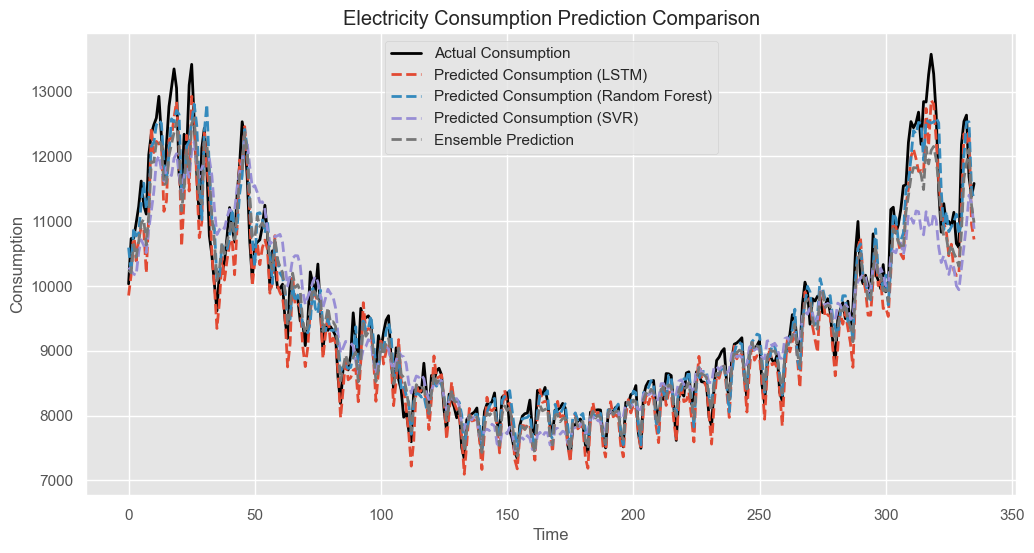

In [130]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(actual_test, label='Actual Consumption', color='black', linewidth=2)
plt.plot(test_predictions, label='Predicted Consumption (LSTM)', linestyle='dashed', linewidth=2)
plt.plot(y_pred_rf, label='Predicted Consumption (Random Forest)', linestyle='dashed', linewidth=2)
plt.plot(y_pred_svr, label='Predicted Consumption (SVR)', linestyle='dashed', linewidth=2)
plt.plot(y_pred_ensemble, label='Ensemble Prediction', linestyle='dashed', linewidth=2)

plt.title('Electricity Consumption Prediction Comparison')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend()
plt.show()

# SVR with Neural Network

In [131]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import tensorflow as tf

In [132]:
# Load your dataset into a DataFrame (replace 'your_data.csv' with your actual data file)
data = pd.read_csv('electricity.csv')

In [133]:
# Assuming 'Start time UTC' is the datetime column you want to use
# Convert datetime column to numerical features (e.g., year, month, day, hour)
data['Start time UTC'] = pd.to_datetime(data['Start time UTC'])
data['year'] = data['Start time UTC'].dt.year
data['month'] = data['Start time UTC'].dt.month
data['day'] = data['Start time UTC'].dt.day
data['hour'] = data['Start time UTC'].dt.hour

In [134]:
# Drop datetime column after extracting features
data.drop(['Start time UTC'], axis=1, inplace=True)

In [135]:
# Split features and target variable
X = data.drop('Electricity consumption in Finland', axis=1)
y = data['Electricity consumption in Finland']

In [136]:
# Ensure all columns are numeric before scaling
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True) 

In [137]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
# Scale your data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [139]:
# Support Vector Regressor (SVR) Model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

SVR()

In [140]:
# Predict using SVR model
y_pred_svr = svr_model.predict(X_test_scaled)

In [141]:
# Building a neural network using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

c:\Users\vk\Desktop\Puton\keras\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [142]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [143]:
# Train the neural network
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

In [144]:
# Predict using neural network
y_pred_nn = model.predict(X_test_scaled)

332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [145]:
# You can average predictions from SVR and neural network
y_pred_ensemble = (y_pred_svr + y_pred_nn.flatten()) / 2

In [177]:
# Calculate Mean Squared Error for SVR model
mse_svr = mean_squared_error(y_test, y_pred_svr)

# Calculate Mean Squared Error for neural network model
mse_nn = mean_squared_error(y_test, y_pred_nn)

# Calculate Mean Squared Error for ensemble model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)

In [178]:
print("MSE for SVR model:", mse_svr)
print("MSE for neural network model:", mse_nn)
print("MSE for ensemble model:", mse_ensemble)

MSE for SVR model: 1408547.6137126335
MSE for neural network model: 545454.6659171466
MSE for ensemble model: 773950.6524944855


In [179]:
# Calculate performance metrics for SVR model
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

In [180]:
# Calculate performance metrics for neural network model
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

In [181]:
# Calculate performance metrics for ensemble model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
rmse_ensemble = np.sqrt(mse_ensemble)
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

In [182]:
# Print performance metrics
print("SVR Model:")
print("  MSE:", mse_svr)
print("  RMSE:", rmse_svr)
print("  MAE:", mae_svr)
print("  R2 Score:", r2_svr)
print()

SVR Model:
  MSE: 1408547.6137126335
  RMSE: 1186.8224861842791
  MAE: 932.7517655392617
  R2 Score: 0.4395418168283264



In [183]:
print("Neural Network Model:")
print("  MSE:", mse_nn)
print("  RMSE:", rmse_nn)
print("  MAE:", mae_nn)
print("  R2 Score:", r2_nn)
print()

Neural Network Model:
  MSE: 545454.6659171466
  RMSE: 738.5490274295584
  MAE: 571.7695185751517
  R2 Score: 0.7829647162181023



In [184]:
print("Ensemble Model:")
print("  MSE:", mse_ensemble)
print("  RMSE:", rmse_ensemble)
print("  MAE:", mae_ensemble)
print("  R2 Score:", r2_ensemble)

Ensemble Model:
  MSE: 773950.6524944855
  RMSE: 879.7446518703513
  MAE: 683.5740764760819
  R2 Score: 0.6920466355991526


In [185]:
# Define model names
models = ['SVR', 'Neural Network', 'Ensemble']

In [186]:
# Define performance metrics
mse_scores = [mse_svr, mse_nn, mse_ensemble]
rmse_scores = [rmse_svr, rmse_nn, rmse_ensemble]
mae_scores = [mae_svr, mae_nn, mae_ensemble]
r2_scores = [r2_svr, r2_nn, r2_ensemble]

In [187]:
# Plotting
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

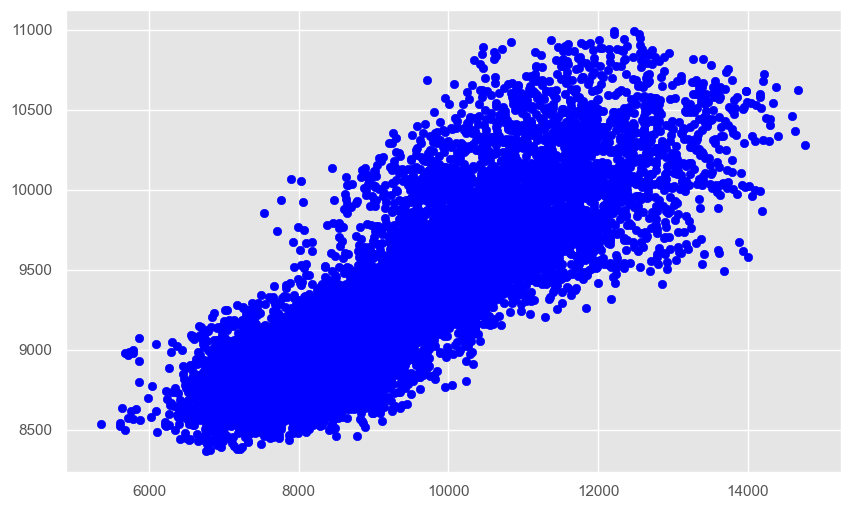

In [188]:
# Plotting actual vs predicted values for SVR model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, color='blue', label='SVR Model')

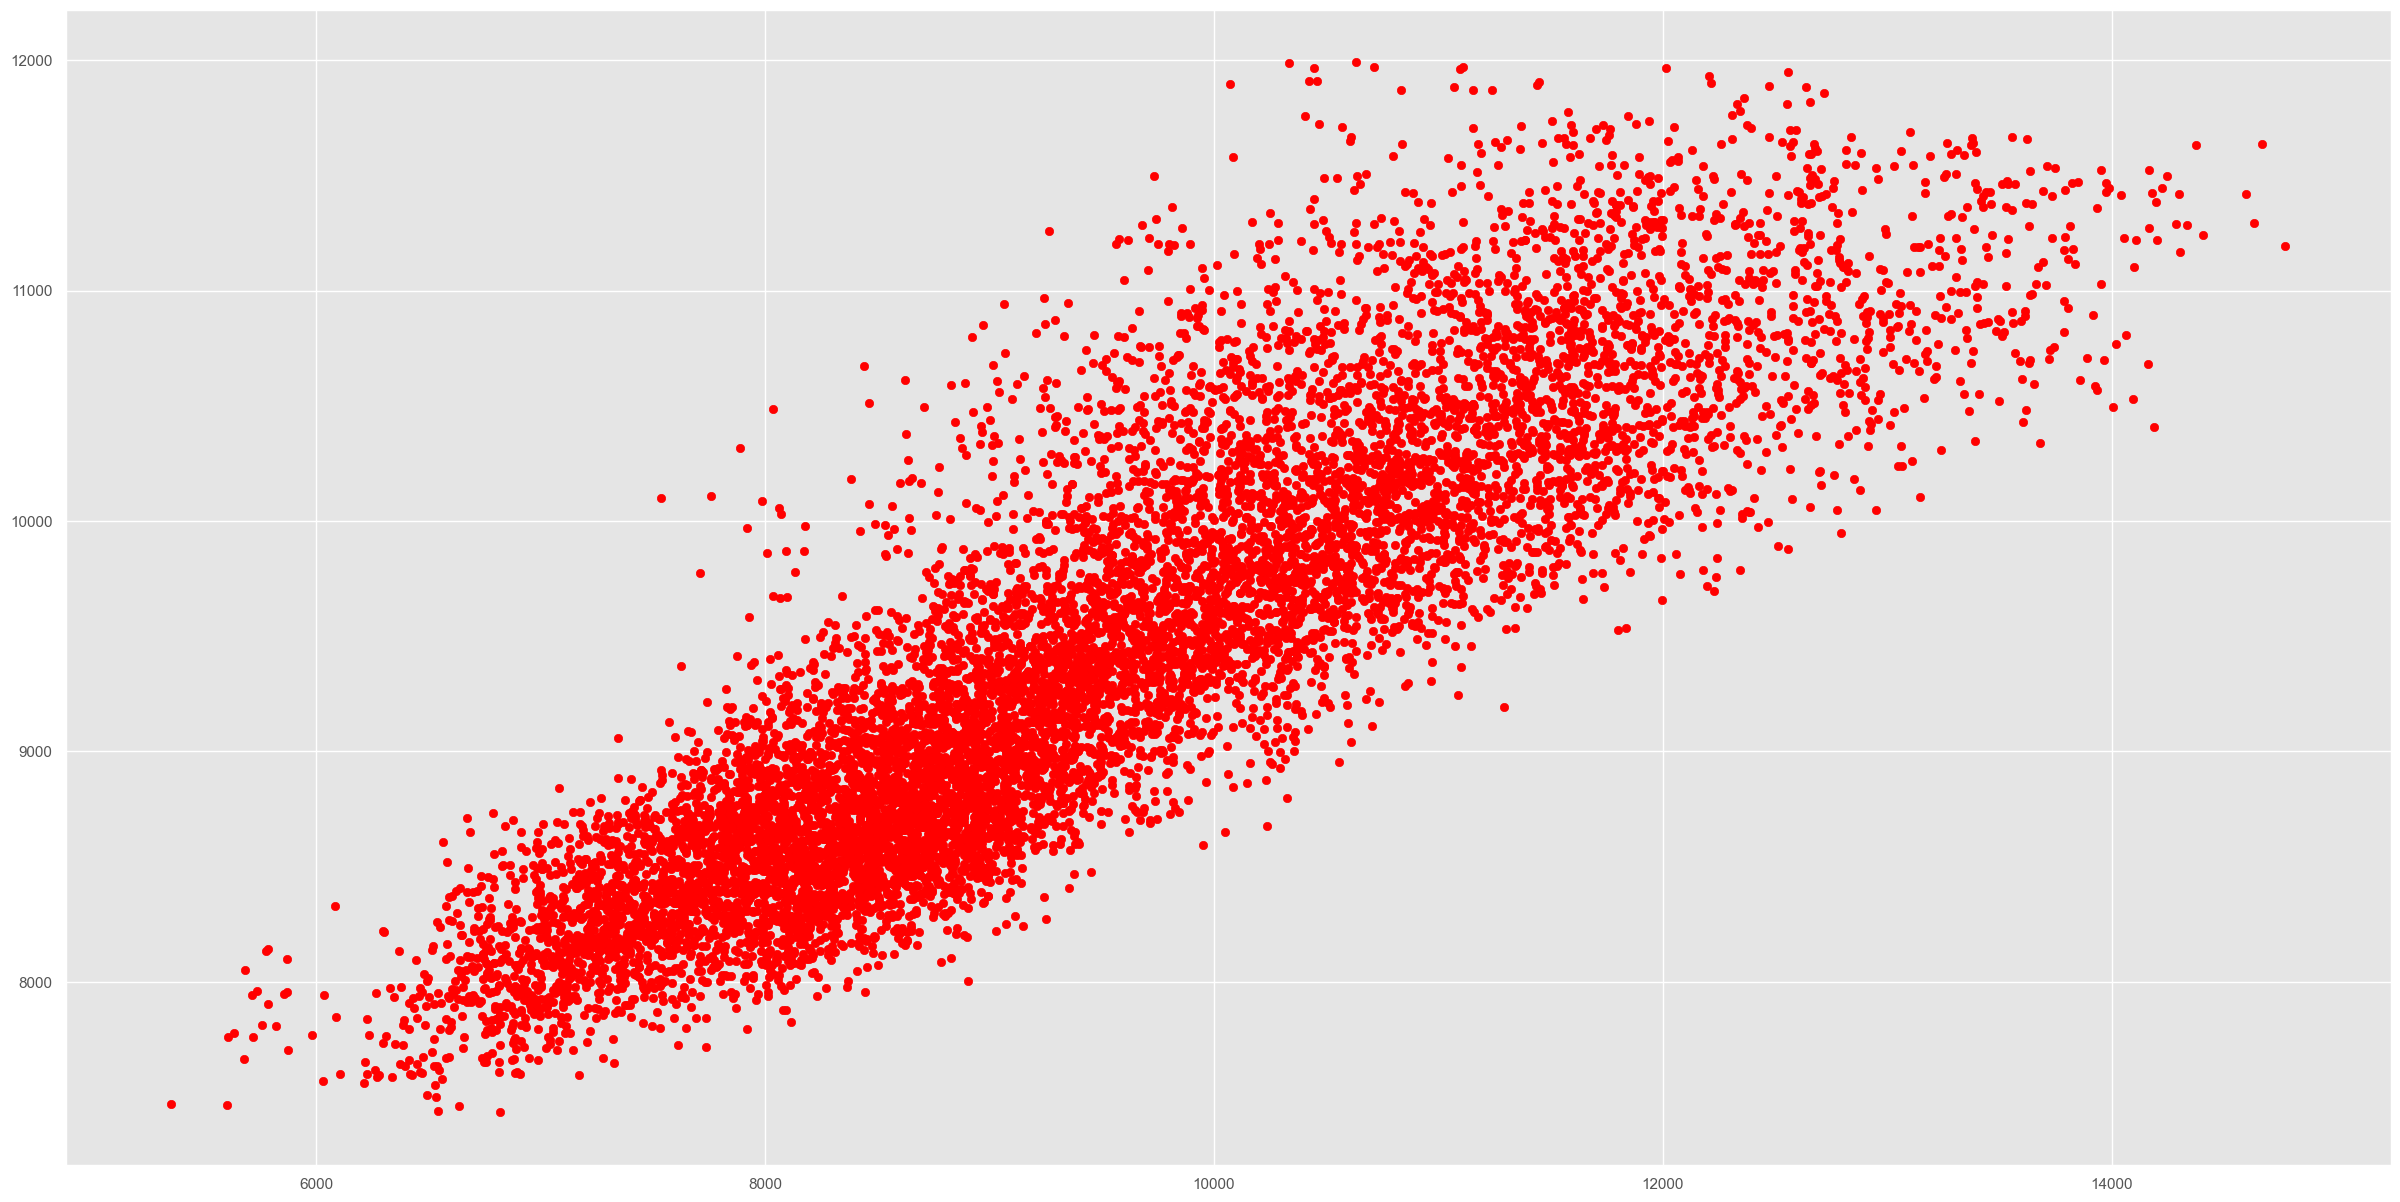

In [189]:
# Plotting actual vs predicted values for SVR with Neural Network model
plt.scatter(y_test, y_pred_ensemble, color='red', label='SVR with Neural Network')

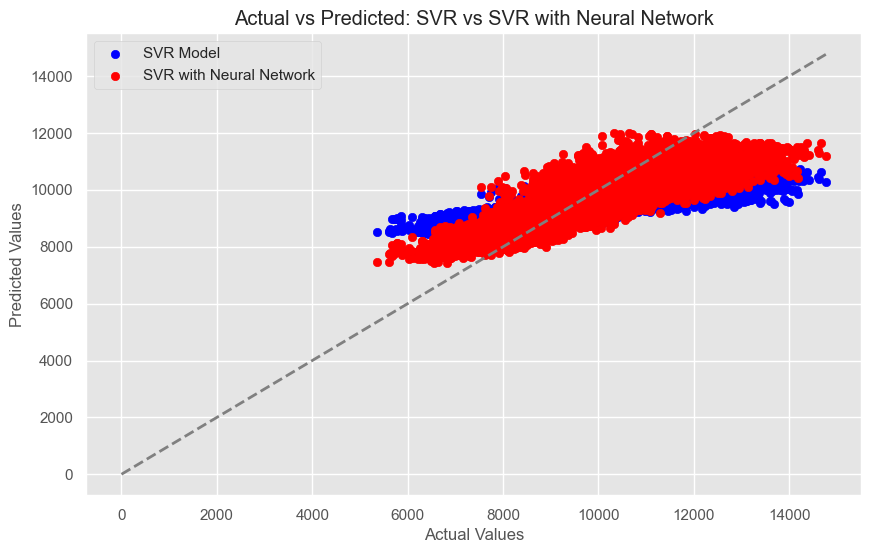

In [194]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values for SVR model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, color='blue', label='SVR Model')

# Plotting actual vs predicted values for SVR with Neural Network model
plt.scatter(y_test, y_pred_ensemble, color='red', label='SVR with Neural Network')

# Plotting the diagonal line
max_val = max(y_test.max(), y_pred_svr.max(), y_pred_ensemble.max())
plt.plot([0, max_val], [0, max_val], color='gray', linestyle='--', lw=2)

plt.title('Actual vs Predicted: SVR vs SVR with Neural Network')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


# Future Forecasting

In [195]:
print(len(test_data))
print(test_data[0])
print(len(train_data))
x_input=test_data[337:].reshape(1,-1)
print(x_input.shape)
# print(x_input[0])
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
# print(temp_input)

437
[0.40285095]
1398
(1, 100)


In [202]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
test = ""
while(i<30):

    if(len(temp_input)>100):
        test = "if"
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        test="else"
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(test)
print(len(lst_output))

ValueError: cannot reshape array of size 1 into shape (1,100,1)

In [201]:
print(len(y))
day_new=np.arange(1,101)
day_pred=np.arange(101, 131 )
plt.figure(figsize = (15,10))
plt.plot(day_new,scaler.inverse_transform(y[2084:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
print(scaler.inverse_transform(lst_output))

52966


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

<Figure size 1500x1000 with 0 Axes>

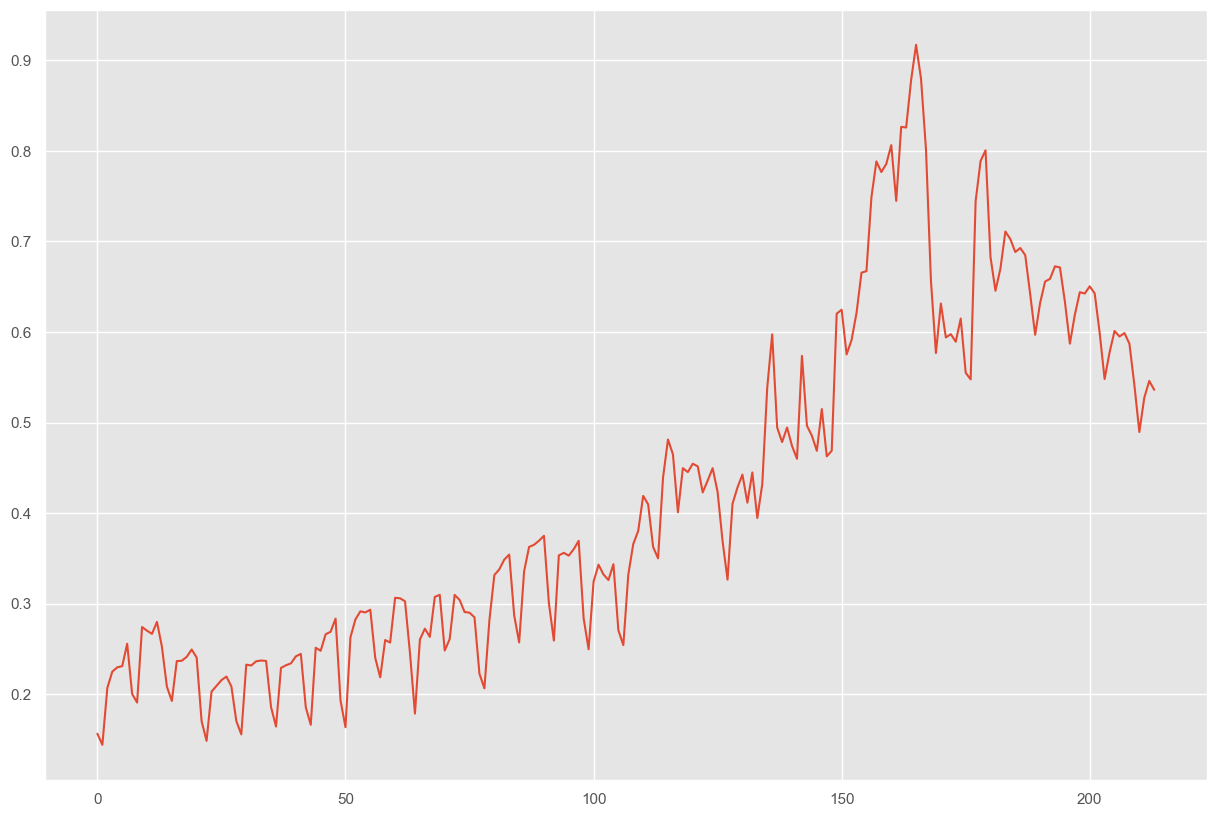

In [ ]:
df3=y.tolist()
df3.extend(lst_output)
plt.figure(figsize=(15,10))
plt.plot(df3[2000:])

# Mean Square Error

In [ ]:
# Evaluate the ensemble model
mse_ensemble = mean_squared_error(actual_test, y_pred_ensemble)
print("Mean Squared Error (Ensemble):", mse_ensemble)

Mean Squared Error (Ensemble): 142239.7544125952


# Accuracy

In [ ]:
accuracy_ensemble = 1 - mse_ensemble / np.var(actual_test)
print("Accuracy (Ensemble):", accuracy_ensemble)

Accuracy (Ensemble): 0.9393672817188691


# Overall Summary

In [ ]:
mse_ensemble = mean_squared_error(actual_test, y_pred_ensemble)
mae_ensemble = mean_absolute_error(actual_test, y_pred_ensemble)

In [ ]:
r2_ensemble = r2_score(actual_test, y_pred_ensemble)
print("\nEnsemble Model:")
print("Mean Squared Error (MSE):", mse_ensemble)
print("Mean Absolute Error (MAE):", mae_ensemble)
print("R-squared (R2):", r2_ensemble)


Ensemble Model:
Mean Squared Error (MSE): 142239.7544125952
Mean Absolute Error (MAE): 274.0891102142844
R-squared (R2): 0.9393672817188691
